<a href="https://colab.research.google.com/github/Fatai-soliu/bank-telemarketing/blob/main/Comparative_Analysis_of_KNN_and_Decision_Tree_Algorithms_in_Predicting_Student_Dropout_and_Academic_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparative Analysis of KNN and Decision Tree Algorithms in Predicting Student Dropout and Academic Success

This notebook focus on the analysis and

In [66]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
#Import the dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/data.csv')

In [68]:
data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


The original dataset has already been encoded. To perform effective exploratory data analysis (EDA), the categorical variables will be decoded to ensure the data is clearly interpretable.

In [69]:
data['Admission grade']

,Admission grade
0,127.3
1,142.5
2,124.8
3,119.6
4,141.5
...,...
4419,122.2
4420,119.0
4421,149.5
4422,153.8


In [70]:
# Dictionary mappings for the dataset

data_mappings = {
    "Marital status": {
        1: "single", 2: "married", 3: "widower", 4: "divorced", 5: "facto union", 6: "legally separated"
    },
    "Application mode": {
        1: "1st phase - general contingent", 2: "Ordinance No. 612/93", 5: "1st phase - special contingent (Azores Island)",
        7: "Holders of other higher courses", 10: "Ordinance No. 854-B/99", 15: "International student (bachelor)",
        16: "1st phase - special contingent (Madeira Island)", 17: "2nd phase - general contingent",
        18: "3rd phase - general contingent", 26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
        27: "Ordinance No. 533-A/99, item b3 (Other Institution)", 39: "Over 23 years old", 42: "Transfer",
        43: "Change of course", 44: "Technological specialization diploma holders",
        51: "Change of institution/course", 53: "Short cycle diploma holders",
        57: "Change of institution/course (International)"
    },
    "Application order": {
        i: f"{i} - {'first choice' if i == 0 else 'last choice' if i == 9 else 'choice'}" for i in range(10)
    },
    "Course": {
        33: "Biofuel Production Technologies", 171: "Animation and Multimedia Design", 8014: "Social Service (evening attendance)",
        9003: "Agronomy", 9070: "Communication Design", 9085: "Veterinary Nursing", 9119: "Informatics Engineering",
        9130: "Equinculture", 9147: "Management", 9238: "Social Service", 9254: "Tourism", 9500: "Nursing",
        9556: "Oral Hygiene", 9670: "Advertising and Marketing Management", 9773: "Journalism and Communication",
        9853: "Basic Education", 9991: "Management (evening attendance)"
    },
    "Daytime/evening attendance\t": {
        1: "daytime", 0: "evening"
    },
    "Previous qualification": {
        1: "Secondary education", 2: "Higher education - bachelor's degree", 3: "Higher education - degree",
        4: "Higher education - master's", 5: "Higher education - doctorate", 6: "Frequency of higher education",
        9: "12th year of schooling - not completed", 10: "11th year of schooling - not completed",
        12: "Other - 11th year of schooling", 14: "10th year of schooling", 15: "10th year of schooling - not completed",
        19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.", 38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
        39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
        42: "Professional higher technical course", 43: "Higher education - master (2nd cycle)"
    },
    "Nacionality": {
        1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch", 14: "English",
        17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean", 24: "Guinean", 25: "Mozambican", 26: "Santomean",
        32: "Turkish", 41: "Brazilian", 62: "Romanian", 100: "Moldova (Republic of)", 101: "Mexican",
        103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"
    },
    "Mother's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree", 4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed", 10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)", 12: "Other - 11th Year of Schooling", 14: "10th Year of Schooling",
        18: "General commerce course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        22: "Technical-professional course", 26: "7th year of schooling", 27: "2nd cycle of the general high school course",
        29: "9th Year of Schooling - Not Completed", 30: "8th year of schooling", 34: "Unknown", 35: "Can't read or write",
        36: "Can read without having a 4th year of schooling", 37: "Basic education 1st cycle (4th/5th year) or equiv.",
        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)", 41: "Specialized higher studies course", 42: "Professional higher technical course",
        43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)"
    },
    "Father's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree", 4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed", 10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)", 12: "Other - 11th Year of Schooling", 13: "2nd year complementary high school course",
        14: "10th Year of Schooling", 18: "General commerce course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        20: "Complementary High School Course", 22: "Technical-professional course", 25: "Complementary High School Course - not concluded",
        26: "7th year of schooling", 27: "2nd cycle of the general high school course", 29: "9th Year of Schooling - Not Completed",
        30: "8th year of schooling", 31: "General Course of Administration and Commerce", 33: "Supplementary Accounting and Administration",
        34: "Unknown", 35: "Can't read or write", 36: "Can read without having a 4th year of schooling",
        37: "Basic education 1st cycle (4th/5th year) or equiv.", 38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        39: "Technological specialization course", 40: "Higher education - degree (1st cycle)", 41: "Specialized higher studies course",
        42: "Professional higher technical course", 43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)"
    },
    "Mother's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
        2: "Specialists in Intellectual and Scientific Activities", 3: "Intermediate Level Technicians and Professions",
        4: "Administrative staff", 5: "Personal Services, Security and Safety Workers and Sellers",
        6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 7: "Skilled Workers in Industry, Construction and Craftsmen",
        8: "Installation and Machine Operators and Assembly Workers", 9: "Unskilled Workers", 10: "Armed Forces Professions",
        90: "Other Situation", 99: "(blank)", 122: "Health professionals", 123: "teachers", 125: "Specialists in information and communication technologies (ICT)",
        131: "Intermediate level science and engineering technicians and professions", 132: "Technicians and professionals, of intermediate level of health",
        134: "Intermediate level technicians from legal, social, sports, cultural and similar services", 141: "Office workers, secretaries in general and data processing operators",
        143: "Data, accounting, statistical, financial services and registry-related operators", 144: "Other administrative support staff",
        151: "personal service workers", 152: "sellers", 153: "Personal care workers and the like", 171: "Skilled construction workers and the like, except electricians",
        173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like", 175: "Workers in food processing, woodworking, clothing and other industries and crafts",
        191: "cleaning workers", 192: "Unskilled workers in agriculture, animal production, fisheries and forestry", 193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
        194: "Meal preparation assistants"
    },
    "Father's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
        2: "Specialists in Intellectual and Scientific Activities", 3: "Intermediate Level Technicians and Professions",
        4: "Administrative staff", 5: "Personal Services, Security and Safety Workers and Sellers",
        6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 7: "Skilled Workers in Industry, Construction and Craftsmen",
        8: "Installation and Machine Operators and Assembly Workers", 9: "Unskilled Workers", 10: "Armed Forces Professions",
        90: "Other Situation", 99: "(blank)", 101: "Armed Forces Officers", 102: "Armed Forces Sergeants",
        103: "Other Armed Forces personnel", 112: "Directors of administrative and commercial services",
        114: "Hotel, catering, trade and other services directors", 121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
        122: "Health professionals", 123: "teachers", 124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
        131: "Intermediate level science and engineering technicians and professions", 132: "Technicians and professionals, of intermediate level of health",
        134: "Intermediate level technicians from legal, social, sports, cultural and similar services", 135: "Information and communication technology technicians",
        141: "Office workers, secretaries in general and data processing operators", 143: "Data, accounting, statistical, financial services and registry-related operators",
        144: "Other administrative support staff", 151: "personal service workers", 152: "sellers",
        153: "Personal care workers and the like", 154: "Protection and security services personnel",
        161: "Market-oriented farmers and skilled agricultural and animal production workers",
        163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence", 171: "Skilled construction workers and the like, except electricians",
        172: "Skilled workers in metallurgy, metalworking and similar", 174: "Skilled workers in electricity and electronics",
        175: "Workers in food processing, woodworking, clothing and other industries and crafts", 181: "Fixed plant and machine operators",
        182: "assembly workers", 183: "Vehicle drivers and mobile equipment operators", 192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
        193: "Unskilled workers in extractive industry, construction, manufacturing and transport", 194: "Meal preparation assistants",
        195: "Street vendors (except food) and street service providers"
    },
    "Displaced": {1: "yes", 0: "no"},
    "Educational special needs": {1: "yes", 0: "no"},
    "Debtor": {1: "yes", 0: "no"},
    "Tuition fees up to date": {1: "yes", 0: "no"},
    "Gender": {1: "male", 0: "female"},
    "Scholarship holder": {1: "yes", 0: "no"},
    "International": {1: "yes", 0: "no"}
}

In [71]:
#Mapping the dict to the original dataset

for column, mapping in data_mappings.items():
    if column in data.columns:
        data[column] = data[column].map(mapping).fillna(data[column])

The dictionary contain the categorical values has been mapped with the original dataset and fillna was used to retain the data for non-categorical variables

In [72]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5 - choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1 - choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5 - choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2 - choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1 - choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [73]:
#Check the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance	                     4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

The dataset contains 4424 records with 37 features containing both 18 numerical variables and 19 categorical variable. There are no missing values in this data. The data is now set for exploratory analysis

In [74]:
#First, check the decription of the data

data.describe(include = "all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,8,17,2,17,NaN,21,29,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,single,1st phase - general contingent,1 - choice,Nursing,daytime,Secondary education,NaN,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic education 1st cycle (4th/5th year) or eq...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,3026,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [75]:
data.shape

(4424, 37)

In [76]:
## Check for missing data
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


There are no missing values in this dataset

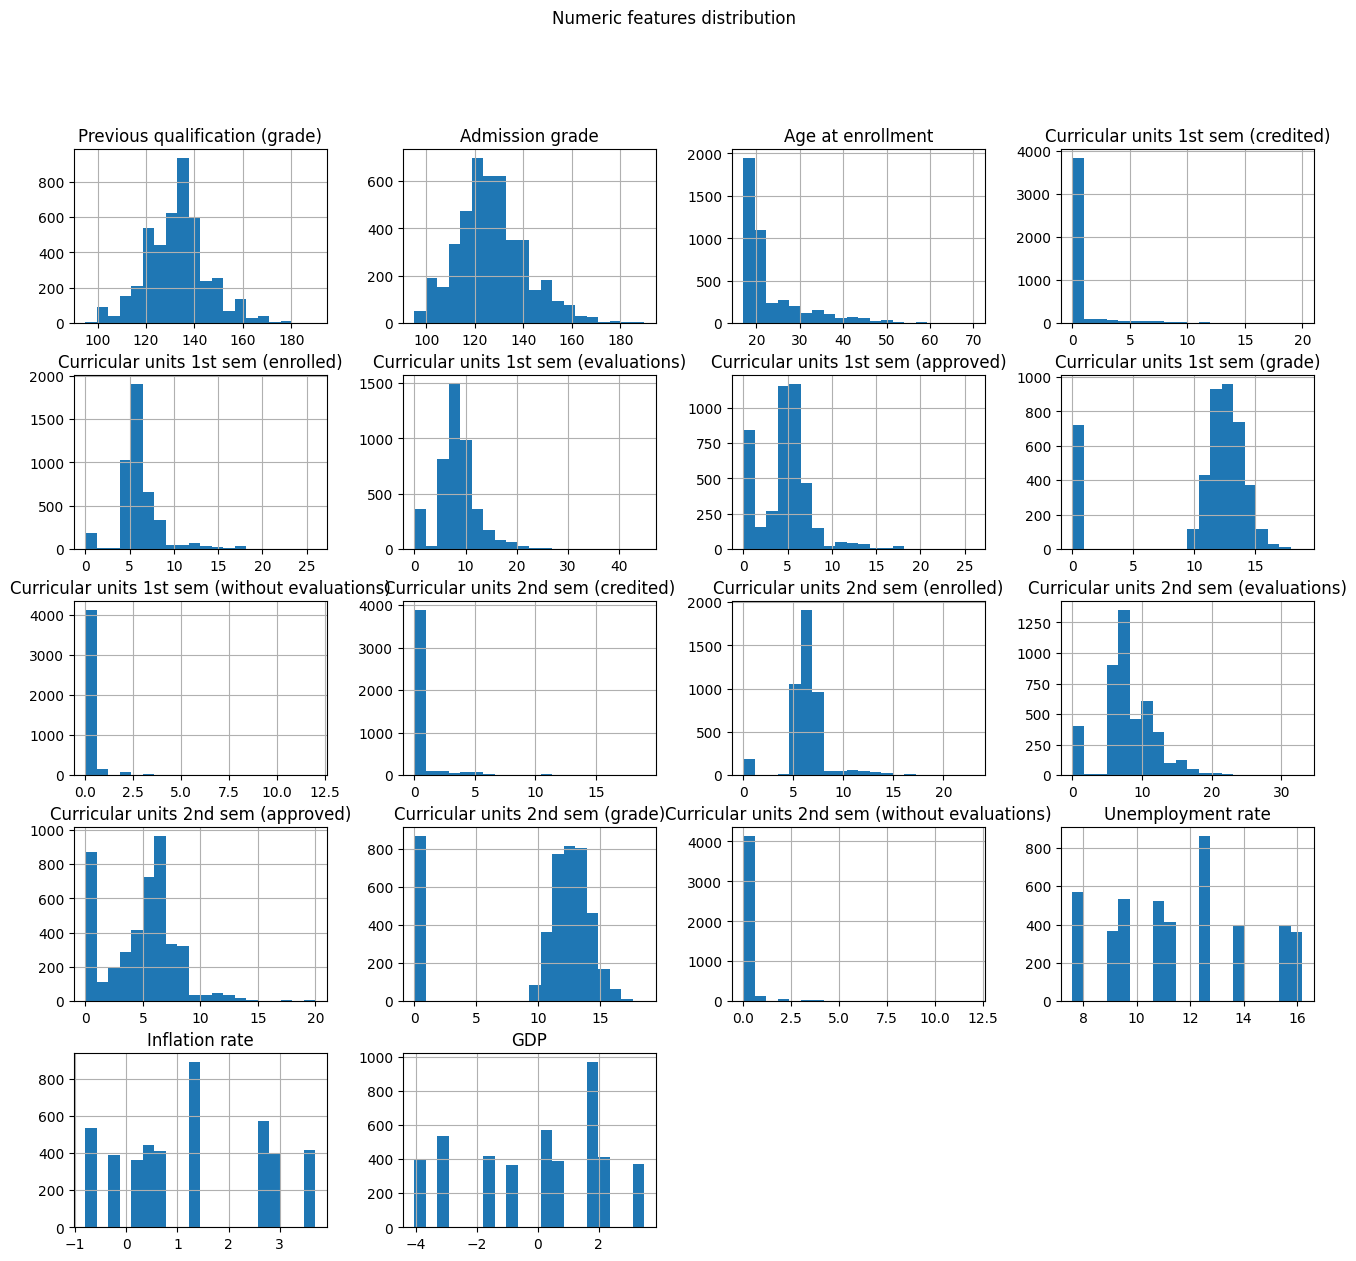

In [77]:
#Creating a histogram to visualise the data distribution for numeric columns

numeric_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

data[numeric_columns].hist(figsize=(16, 14), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()

`Previous qualification (grade)` and `Admission grade`: The distribution of previous qualification and admission grades appears approximately normal, with most values clustered around a central range. There are no significant outliers observed in this distribution.

`Age at enrollment`: The age distribution is slightly skewed to the right, with the majority of students in the typical college age range. A few older students serve as outliers.

`Curricular units 1st sem (credited)`: Most students have zero credited units, indicating few transfers or prior recognitions.

`Curricular units 1st sem (enrolled)`: The enrollment distribution shows a central peak, A few students enrolled in unusually high or low numbers of units, which are outliers.

`Curricular units 1st sem (evaluations)`: Most students have a moderate number of evaluations, suggesting regular engagement.

`Curricular units 1st sem (approved)`: This distribution shows most students successfully complete a standard number of units.

`Curricular units 1st sem (grade)`: The distribution of grades for the first semester is approximately normal, centered around a typical pass range. Outliers are minimal, suggesting consistent performance.

`Curricular units 1st sem (without evaluations)`: Most students completed all evaluations, with a few outliers

`Curricular units 2nd sem (credited)`: Similar to the first semester, the second-semester credits are mostly zero, with outliers at higher credit values, likely due to transferred credits.

`Curricular units 2nd sem (enrolled)`: The enrollment distribution for the second semester mirrors the first, with a central tendency around typical enrollment levels.

`Curricular units 2nd sem (evaluations)`: Most students have completed evaluations for their enrolled units.

`Curricular units 2nd sem (approved)`: The distribution shows most students pass a standard number of units in the second semester.

`Curricular units 2nd sem (grade)`: Grades for the second semester follow a near-normal distribution, with no notable outliers.

`Curricular units 2nd sem (without evaluations)`: Like the first semester, most students completed evaluations, with outliers where students did not complete evaluations.

`Unemployment rate`: The distribution of unemployment rates is slightly right-skewed. A few high values serve as outliers.

`Inflation rate`: The inflation rate distribution is centered around a low-to-moderate range, with a few high or negative outliers.

`GDP`: The GDP distribution shows a slight right skew, with most values in a stable range.

##Identifying Outliers

To visualise and Identify outliers, boxplot were used on all numerical variables. These visualistions helps to identify the noises and distortion in the data



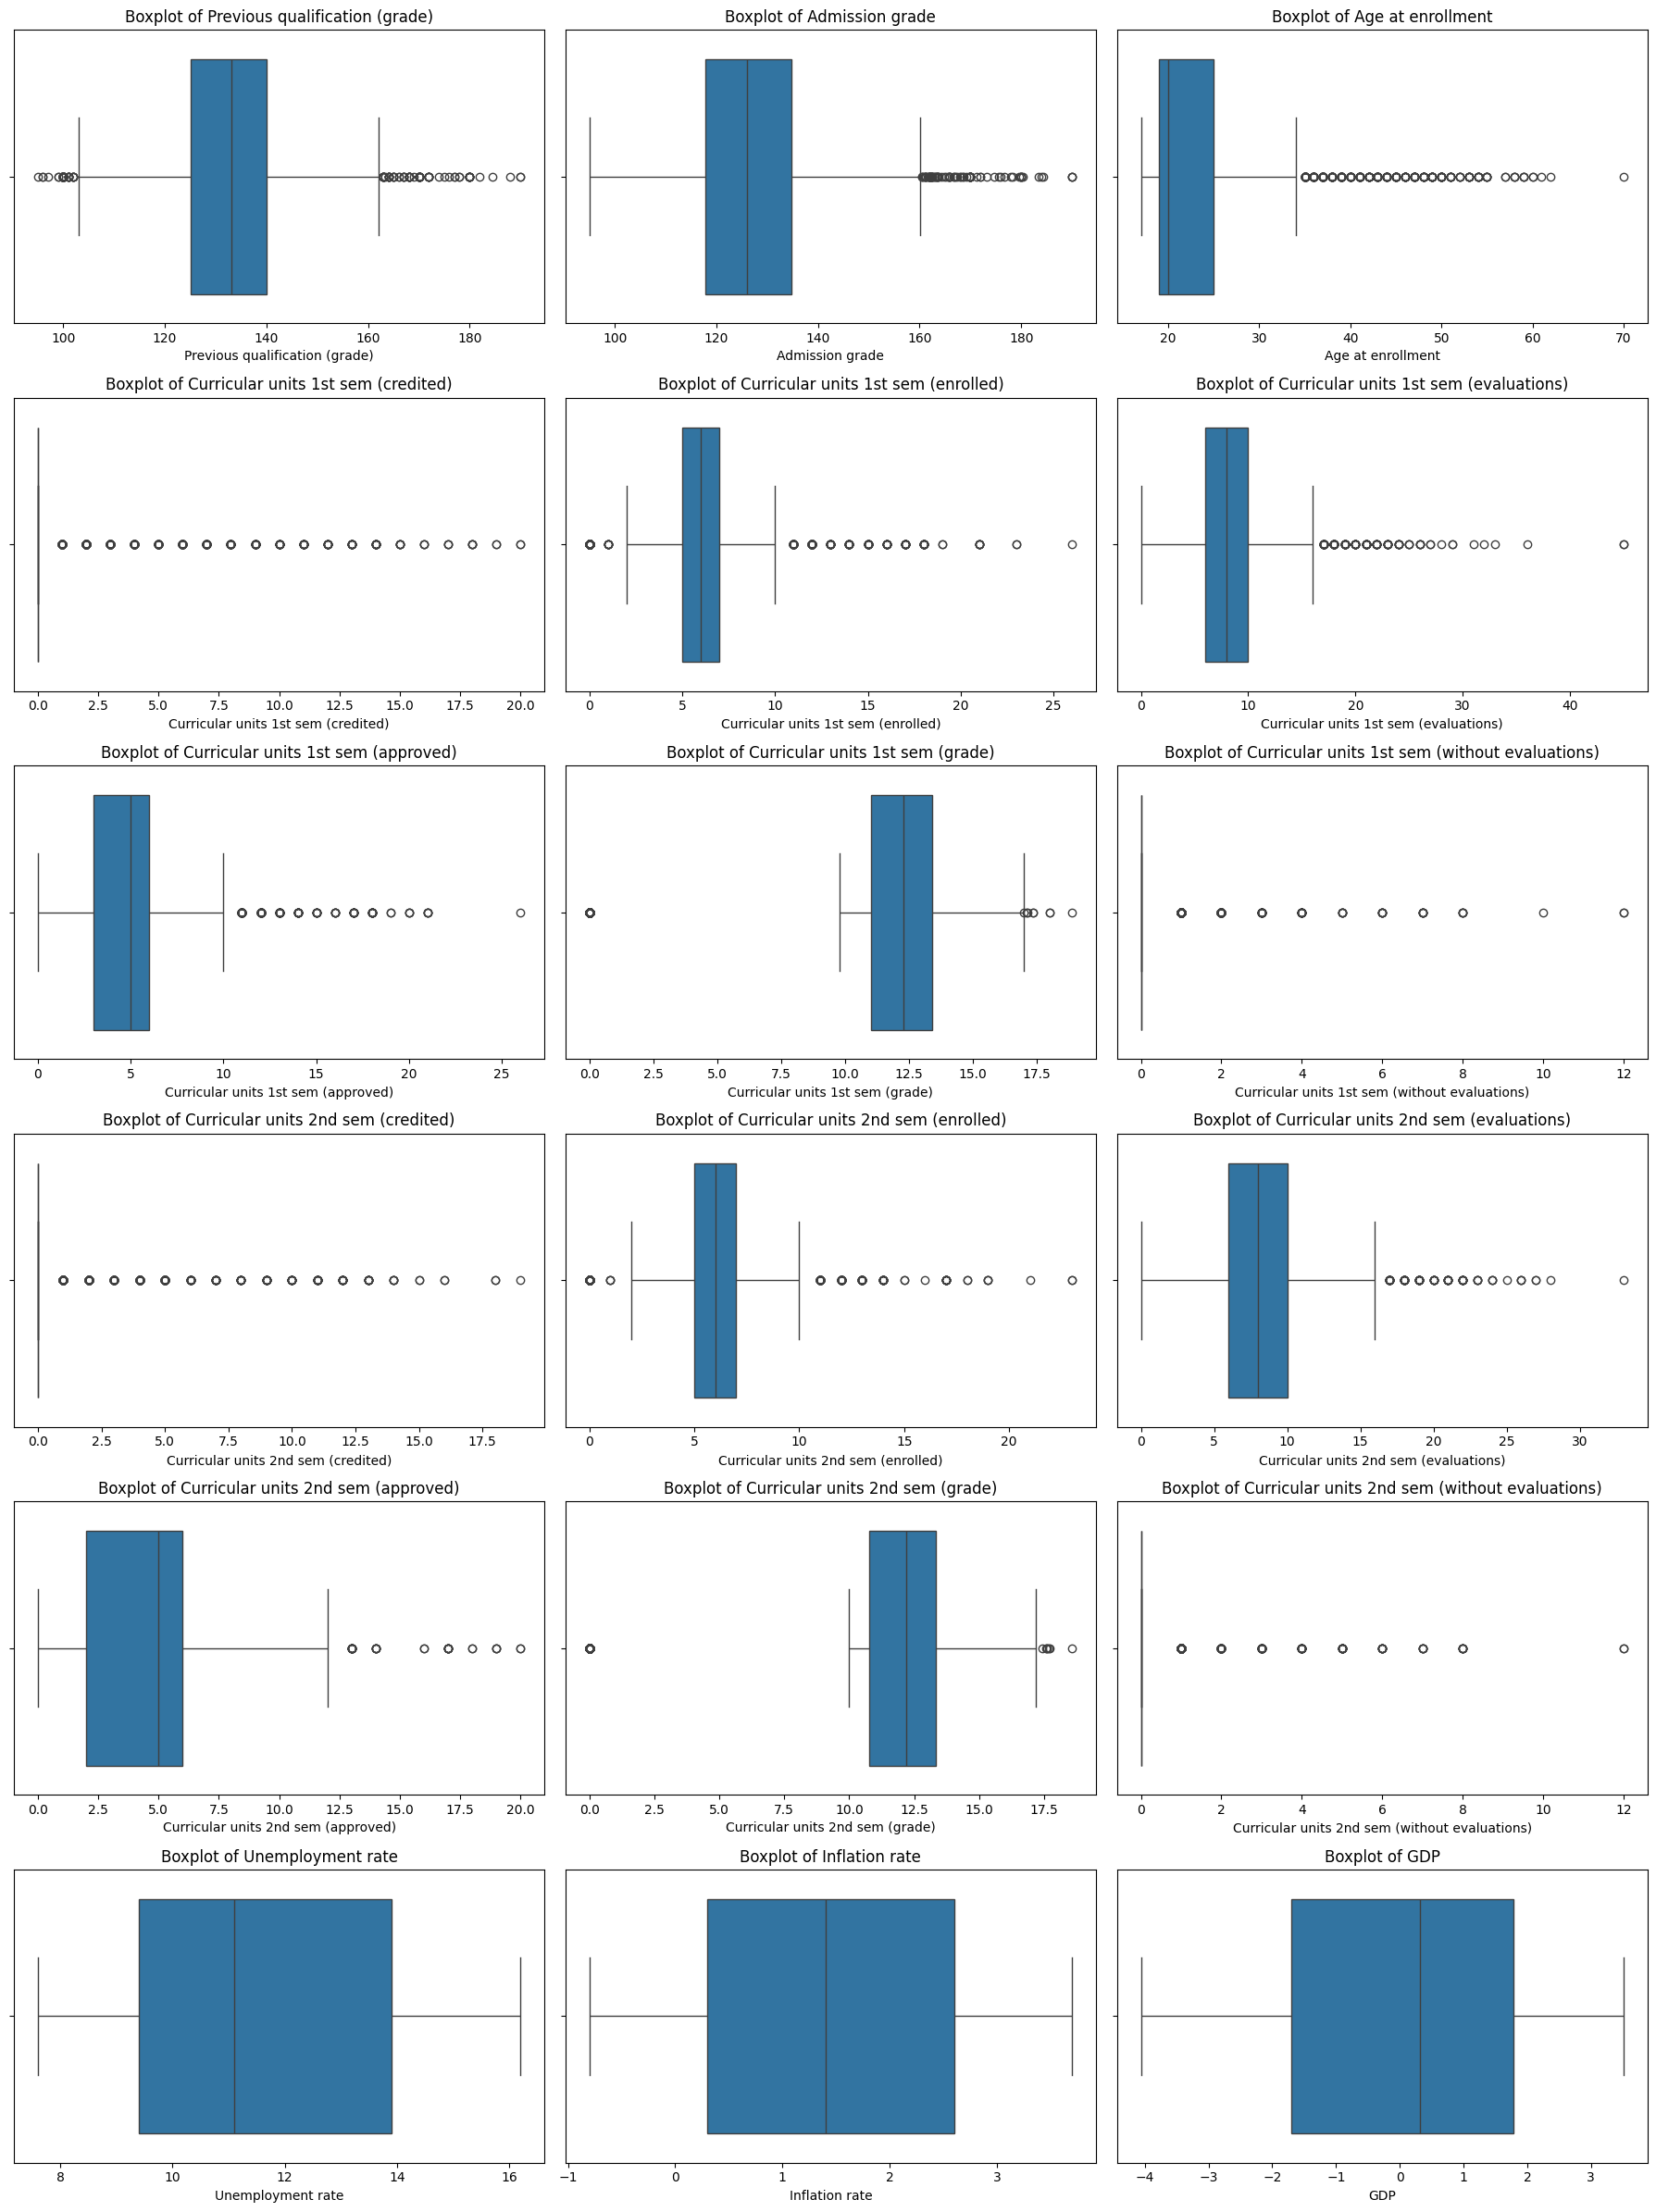

In [50]:
# Creating a boxplot for all numeric data in the dataset too spot outlier

numeric_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

plt.figure(figsize=(18, 24))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

`Previous qualification (grade) and Admission grade`: The distribution shows minor outliers on the higher end but is mostly concentrated.

`Age at enrollment`: A few outliers with higher ages indicate non-traditional students, but the data is largely consistent.

`Curricular units 1st sem (credited)`: Outliers are observed at higher values, suggesting a few students brought in more credits than average.

`Curricular units 1st sem (enrolled)`: Most data falls within a typical range with a few high outliers.

`Curricular units 1st sem (evaluations)`: Shows outliers in both high and low ranges, but they are limited.

`Curricular units 1st sem (approved)`: Outliers exist in the data

`Curricular units 1st sem (grade)`: Near-normal distribution with no major outliers.

`Curricular units 1st sem (without evaluations)`: Outliers are present for students without evaluations.

`Curricular units 2nd sem (credited)`: Contains higher outliers for credited units.

`Curricular units 2nd sem (enrolled)`: A few outliers in the high range but generally consistent.

`Curricular units 2nd sem (evaluations)`: Shows a consistent range with minor outliers on both ends.

`Curricular units 2nd sem (approved)`: Outliers for students with low approvals.

`Curricular units 2nd sem (grade)`: Data appears normal with no significant outliers.

`Curricular units 2nd sem (without evaluations)`: Minor outliers in the data distribution.

`Unemployment rate`: There is Outliers on the higher end

`Inflation rate`: Outliers are present but do not dominate the data. N

`GDP`: There are Outliers at lower GDP values


**Summary**

All variables exhibit acceptable distributions, with some outliers present; however, none are extremely skewed, so no variables require dropping based on the histogram and boxplot analyses. Each variable retains valuable information for exploratory analysis and modeling.

Variables with notable outliers, warranting further investigation to determine validity or error, include: Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), and Unemployment rate.

Summary:
Outliers will be managed using two methods based on their distribution characteristics:

Interquartile Range (IQR) Method (`for Age at enrollment`, `Curricular units 1st sem (enrolled)`, `Curricular units 1st sem (evaluations)`, and `Curricular units 2nd sem (evaluations)`): This method effectively caps outliers in nearly normal distributions, helping maintain dataset patterns without excessive skewing.

99th Percentile Capping (`for Previous qualification (grade)`, `Curricular units 1st sem (credited)`, `Curricular units 1st sem (without evaluations)`, `Curricular units 2nd sem (credited)`, and `Unemployment rate`): This method is suitable for skewed data, especially in columns where outliers represent valid but extreme values, allowing the data to retain its natural distribution.

In [78]:
# Handling outliers - Capping outliers using Interquartile Range (IQR) method

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return data

# Columns selected for IQR method based on near-normal distribution
iqr_columns = ['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']
for col in iqr_columns:
    data = cap_outliers_iqr(data, col)

print(data.head())

  Marital status                  Application mode Application order  \
0         single    2nd phase - general contingent        5 - choice   
1         single  International student (bachelor)        1 - choice   
2         single    1st phase - general contingent        5 - choice   
3         single    2nd phase - general contingent        2 - choice   
4        married                 Over 23 years old        1 - choice   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      daytime   
1                              Tourism                      daytime   
2                 Communication Design                      daytime   
3         Journalism and Communication                      daytime   
4  Social Service (evening attendance)                      evening   

  Previous qualification  Previous qualification (grade) Nacionality  \
0    Secondary education                           122.0  Portuguese

In [79]:
# Handling outliers - Capping outliers using 99th percentile-based method

def cap_outliers_percentile(data, column):
    upper_bound = data[column].quantile(0.99)
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    return data

# Columns selected for 99th percentile method based on skewed distribution
percentile_columns = ['Previous qualification (grade)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Unemployment rate']
for col in percentile_columns:
    data = cap_outliers_percentile(data, col)

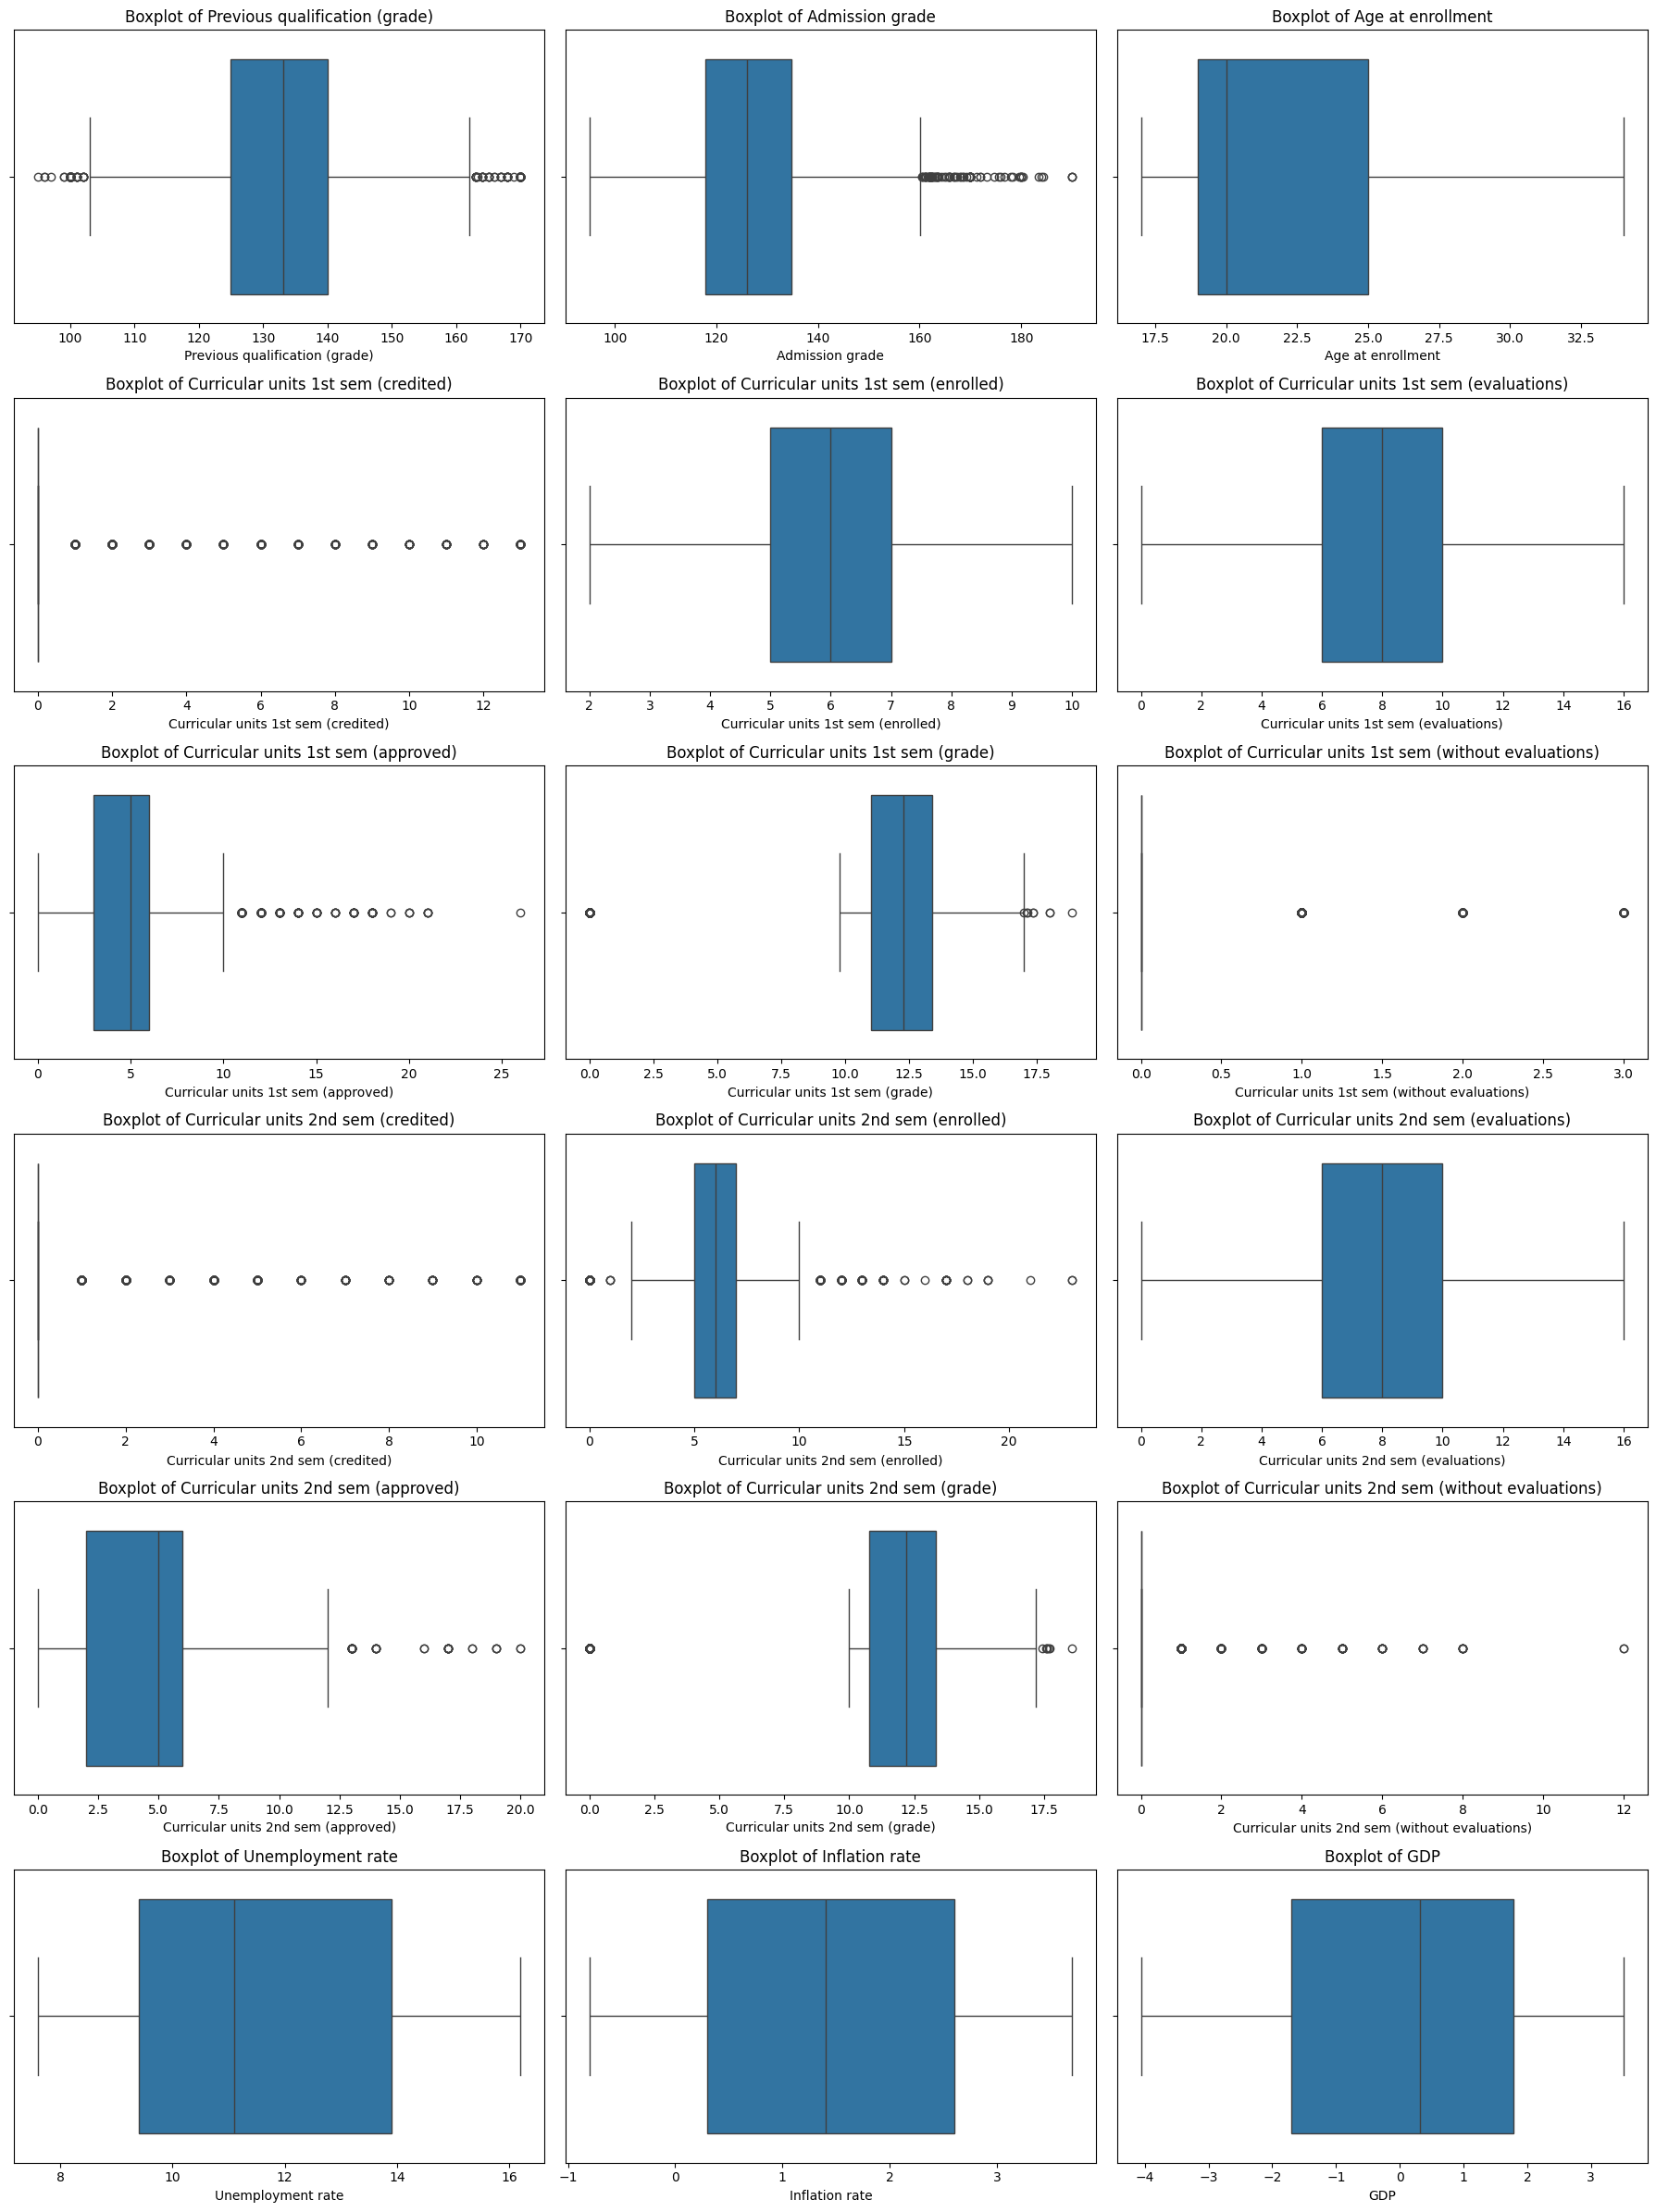

In [80]:
# Re-visualising the numeric columns after treating outliers

numeric_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

plt.figure(figsize=(18, 24))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

The dataset has now been cleaned, making it more reliable for further analysis.

In [81]:
data.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.00000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.561008,126.978119,22.457052,0.689195,6.146022,8.136528,4.706600,10.640822,0.112342,0.52283,6.232143,7.970615,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.015622,14.482001,5.409813,2.230330,1.578002,3.673159,3.094238,4.843663,0.468585,1.79126,2.195951,3.680864,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.00000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.00000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.00000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,170.000000,190.000000,34.000000,13.000000,10.000000,16.000000,26.000000,18.875000,3.000000,11.00000,23.000000,16.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Exploratory Data Analysis

This EDA stage will focus on understanding the feature better and selecting the best features that is suitable for model training. The EDA will include Univariate Descriptive analysis and Bivariate inferential analysis

## Univariate Descriptive Analysis

<ipython-input-93-8868a24906bb>:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


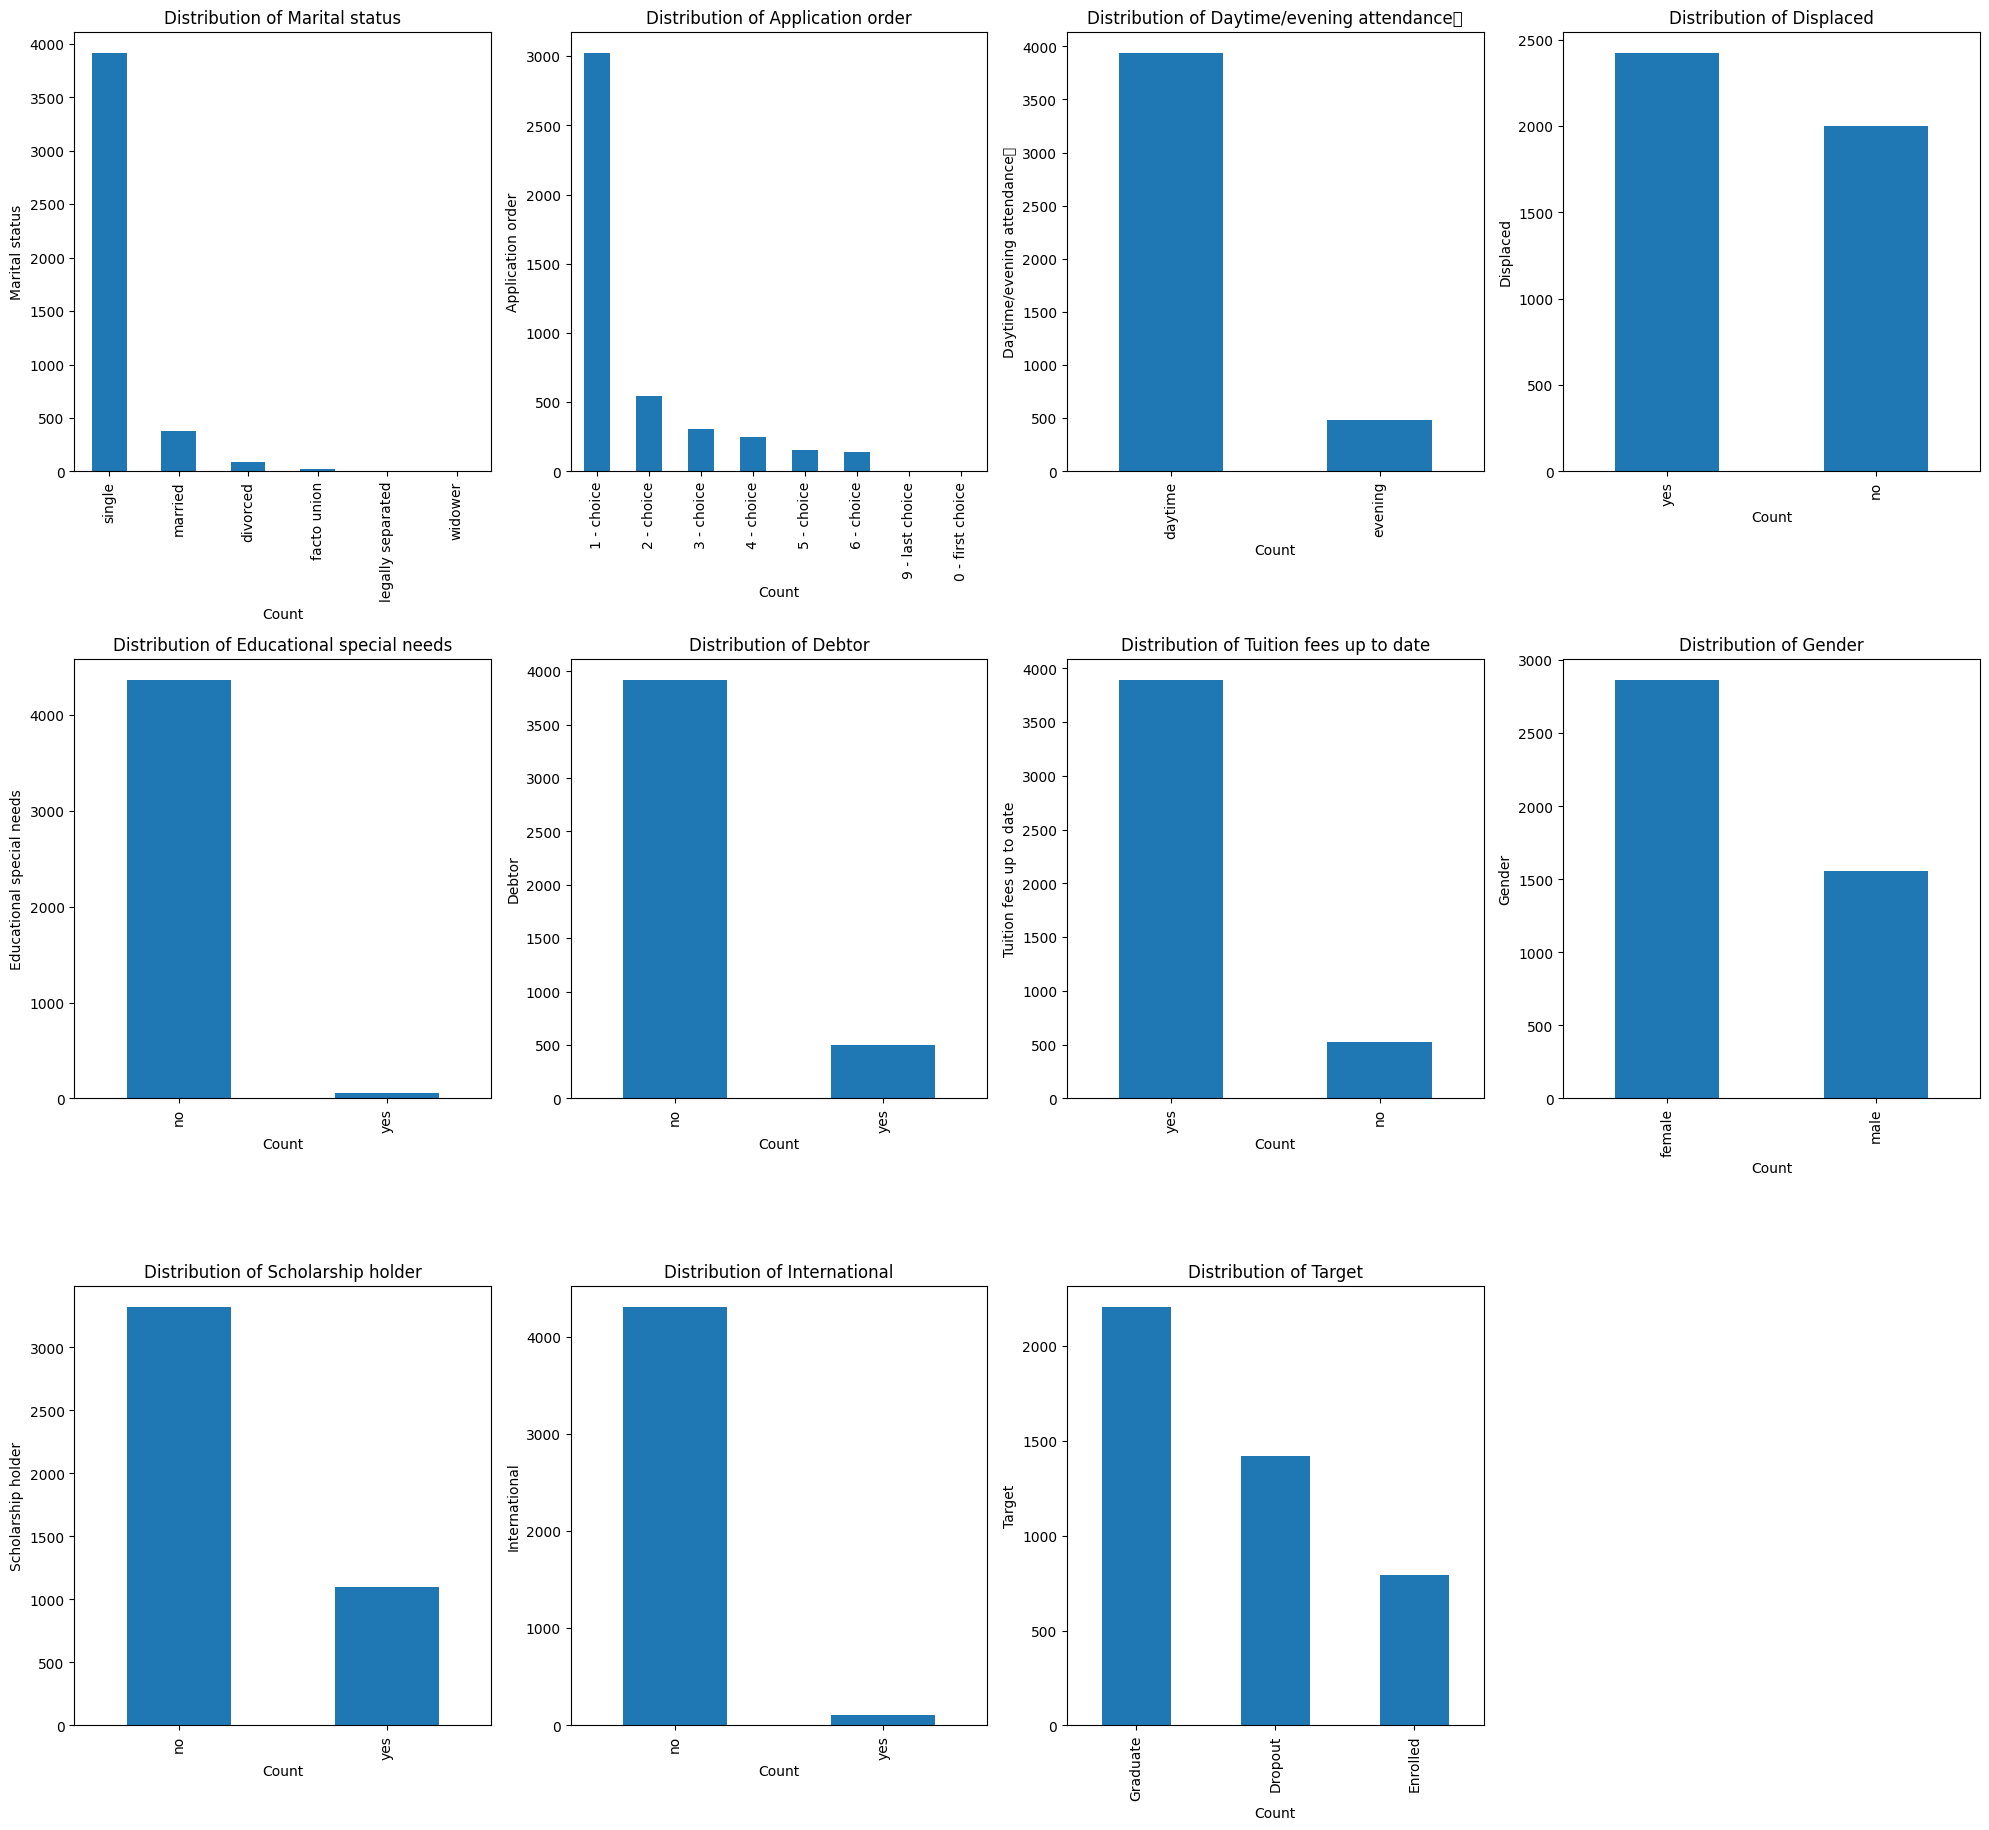

In [93]:
# List of categorical column 1
categorical_column1 = [
    'Marital status', 'Application order', 'Daytime/evening attendance\t',
   'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target'
]

plt.figure(figsize=(20, 30))

# Looping through each categorical column to create a bar chart
for i, col in enumerate(categorical_column1, 1):
    plt.subplot(5, 4, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

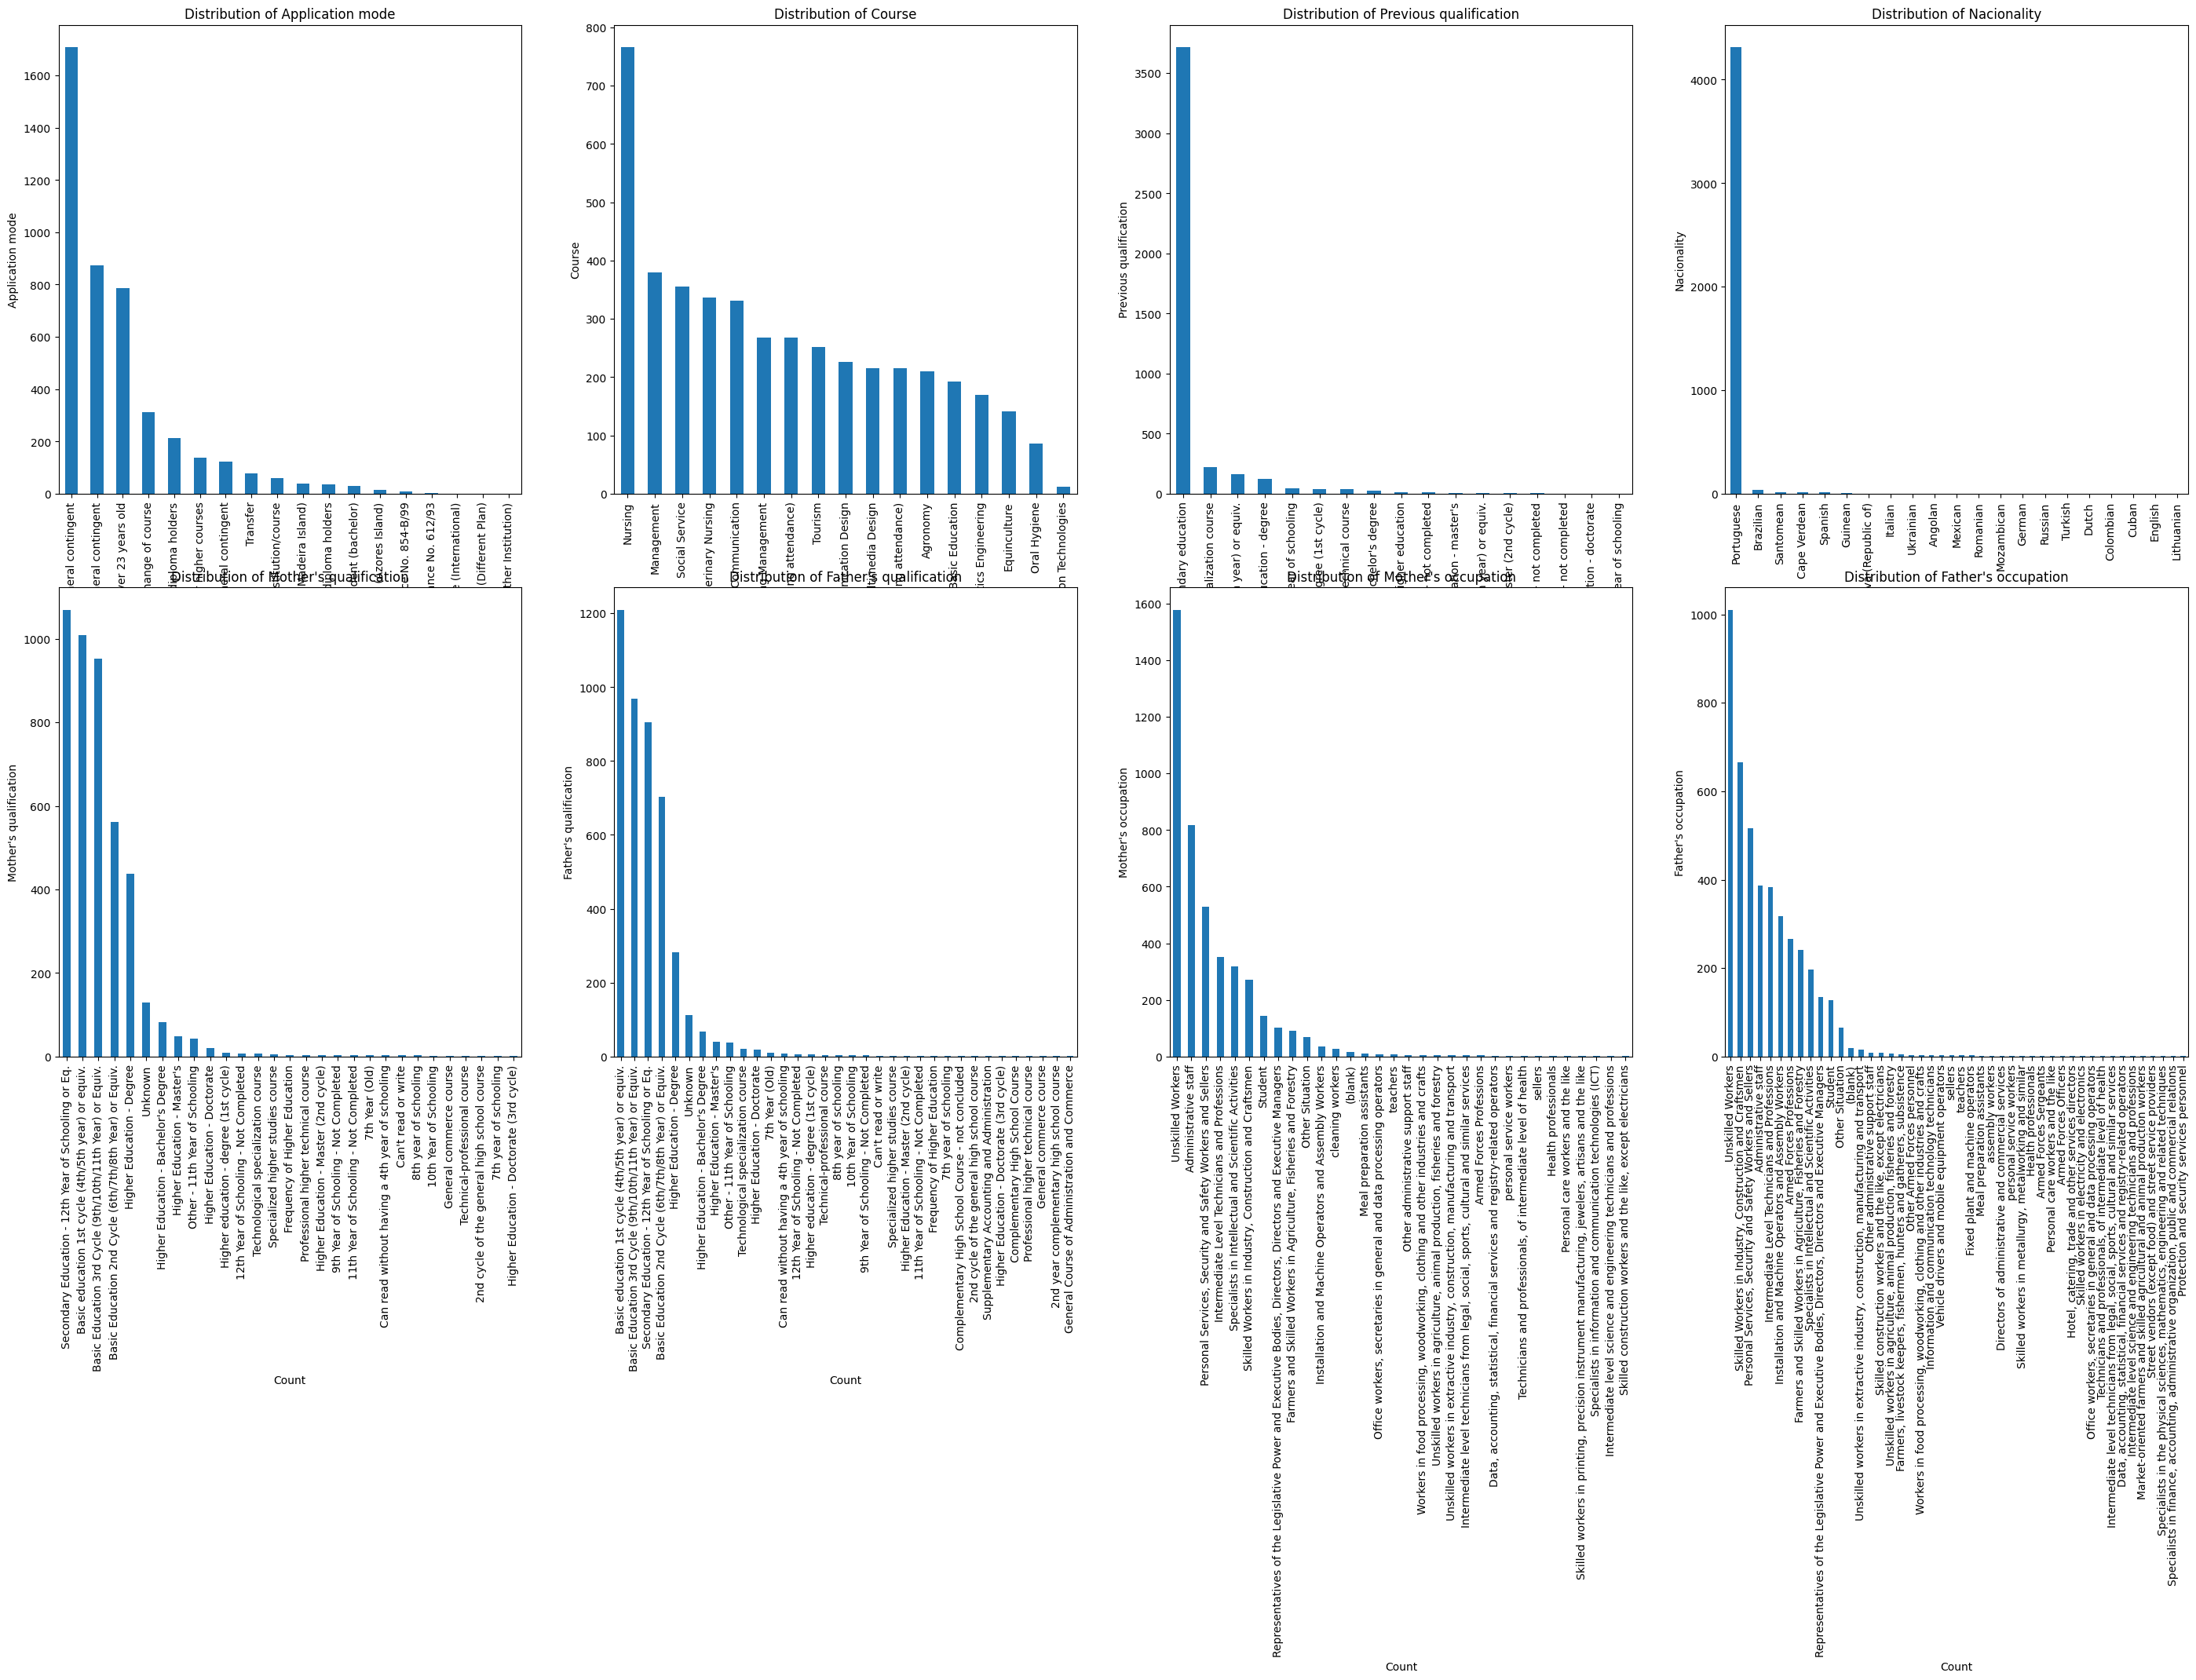

In [97]:
# List of categorical column 2
categorical_column2 = ['Application mode', 'Course',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation"
]

plt.figure(figsize=(35, 45))

# Looping through each categorical column to create a bar chart
for i, col in enumerate(categorical_column2, 1):
    plt.subplot(5, 4, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.show()

`Marital status`: The majority are single, with the least being widowers, suggesting single students may be the primary demographic. Implication: Marital status may not strongly predict outcomes if most students are similar.

`Application mode`: General contingent dominates, with specialized modes (e.g., ordinance categories) being rare. Implication: Application mode could signal applicant diversity or selection bias.

`Application order`: First-choice applications dominate, indicating students primarily enroll in preferred courses. Implication: Higher engagement may correlate with desired course selection.

`Course`: A few courses, like Informatics Engineering, have the highest enrollment, while niche courses have minimal representation. Implication: Course selection may impact dropout/graduation rates due to course-specific factors.

`Daytime/evening attendance`: Most students attend daytime; evening students are a minority. Implication: Attendance type may impact model performance due to differences in schedule demands.

`Previous qualification`: Secondary education is most common, with specialized qualifications being rare. Implication: Homogeneous educational backgrounds may reduce predictive power of this feature.

`Nationality`: Portuguese students dominate, with limited representation from other nationalities. Implication: Models may reflect biases toward local demographics.

`Mother's qualification`: Most have secondary education, with higher qualifications (e.g., master's) rare. Implication: Parental education may only slightly impact academic outcomes.

`Father's qualification`: Similar to mother's qualification, secondary education dominates. Implication: Parent qualifications may have a limited predictive role.

`Mother's occupation`: Unskilled workers are the majority, with specialists being fewer. Implication: Socioeconomic status could influence dropout or engagement.

`Father's occupation`: Similar trend with unskilled workers dominating. Implication: Parental occupation may inform socioeconomic influence on student persistence.

`Displaced`: Most students are not displaced, indicating limited geographic relocation. Implication: Limited effect on outcomes due to lack of diversity in displacement.

`Educational special needs`: Majority do not have special needs, suggesting fewer accommodations required. Implication: Low influence in modeling unless linked with specific support requirements.

`Debtor`: Few students have debt, indicating financial stability among most students. Implication: Debt may have a minimal role in dropout prediction.

`Tuition fees up to date`: Most are up-to-date, showing good financial compliance. Implication: Unpaid fees may be a risk indicator for dropout.

`Gender`: Male students slightly dominate, with a balanced gender distribution. Implication: Gender may be relevant if related to academic persistence or performance trends.

`Scholarship holder`: Non-scholarship holders dominate, potentially indicating limited financial aid. Implication: Scholarships might play a role in retention and success.

`International`: Majority are local students, with minimal international representation. Implication: International status may contribute minimally to predictions.

`Target`: Graduation is most common, with dropout rates relatively low. Implication: The target class imbalance may require handling in predictive models.

##Bivariate Analysis

This analysis is done to understand the relationship between the features and the target variables. This will help identify important features that can be used in our model

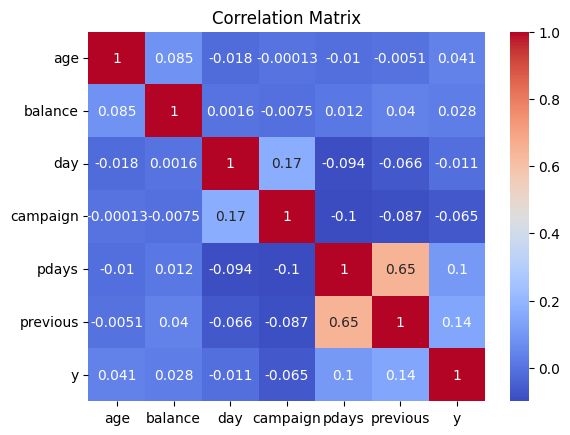

In [ ]:
# Correlation matrix for numeric features vs target variables

numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'y']

correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Each of the numeric features has a relatively weak correlation to the target variable `y`. `day` and `campaign` has a weak negative correlation to the `y` target

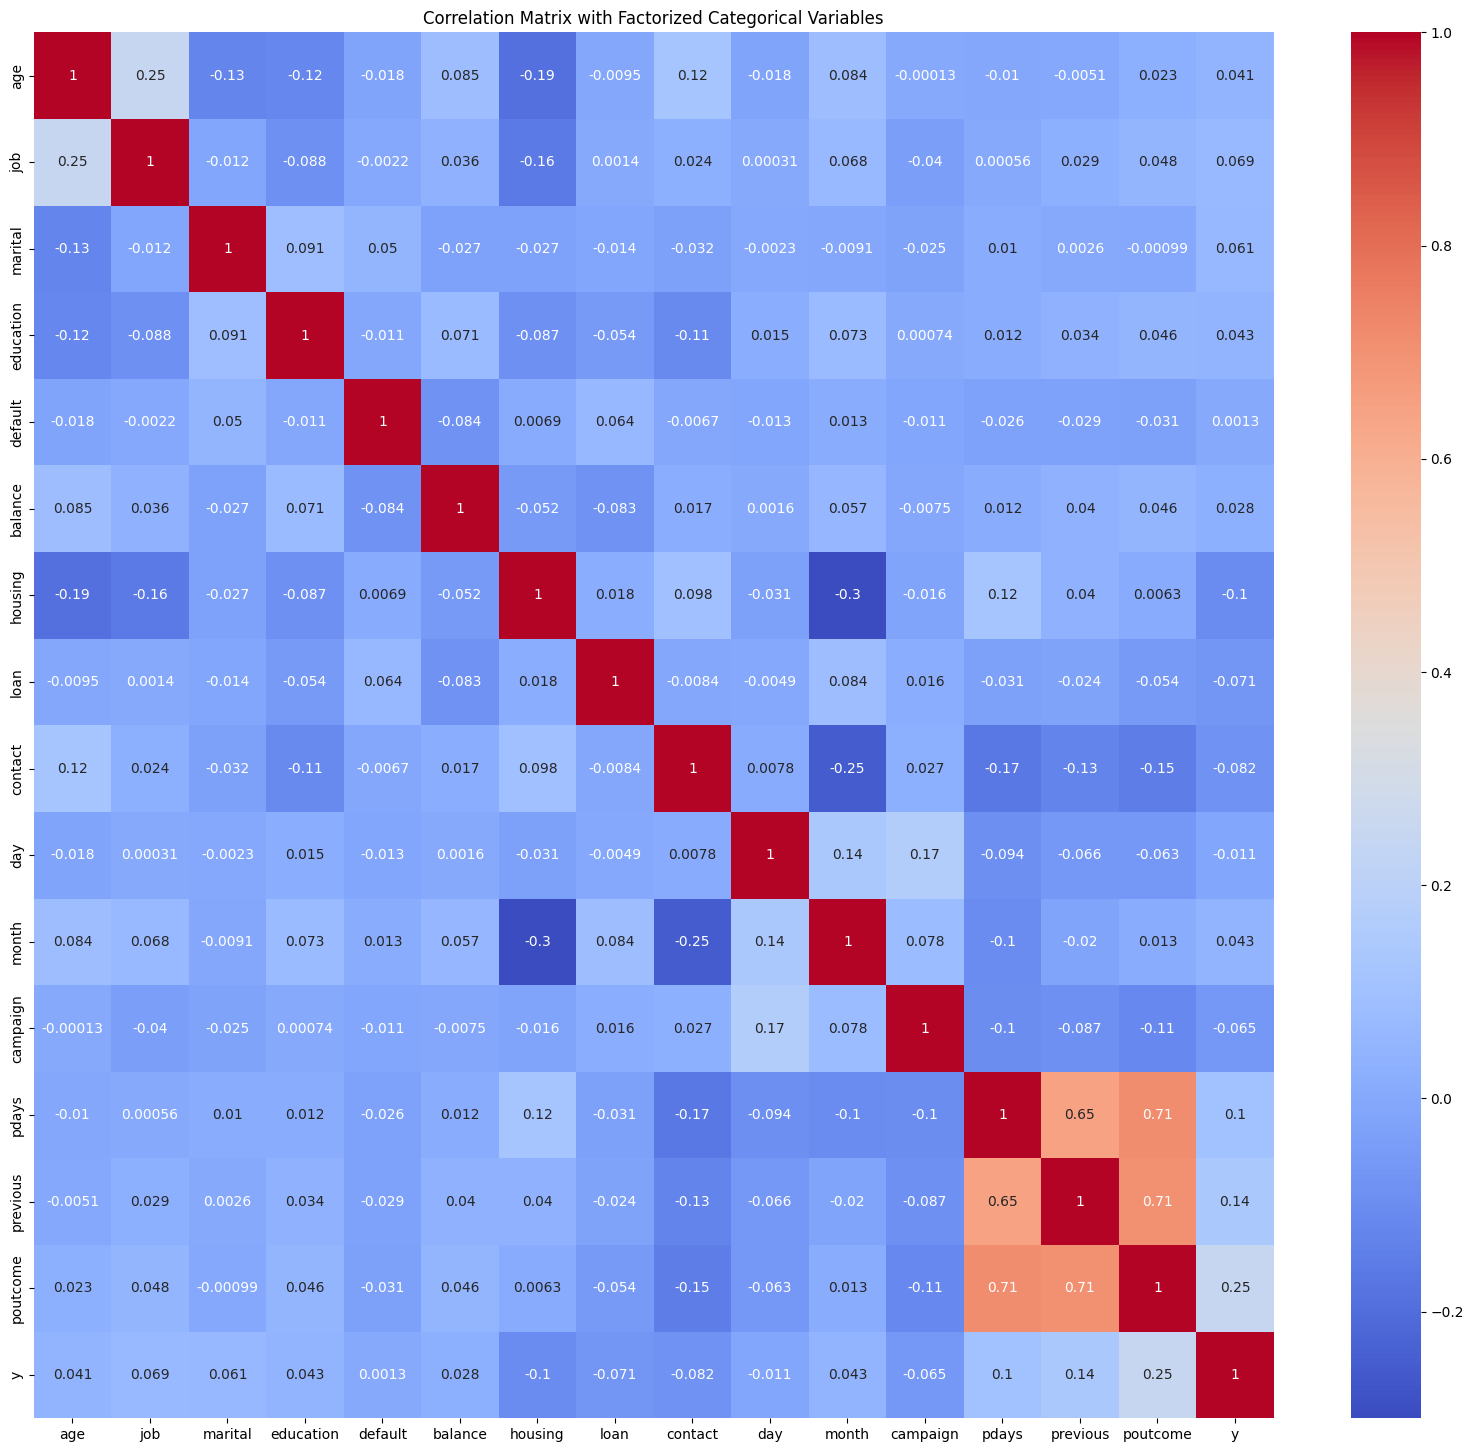

In [ ]:
# Factorizing all categorical columns to integers to check correlation

df_temp = data.copy()
for col in df_temp.select_dtypes(include=['object']).columns:
    df_temp[col] = pd.factorize(df_temp[col])[0]

# Calculate and plot the correlation matrix
correlation_matrix = df_temp.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Factorized Categorical Variables")
plt.show()

There is a strong correlation between `poutcome`, `pdays` and `previous`. poutcome also has a fairly higher correlation with the target variables than other variables   

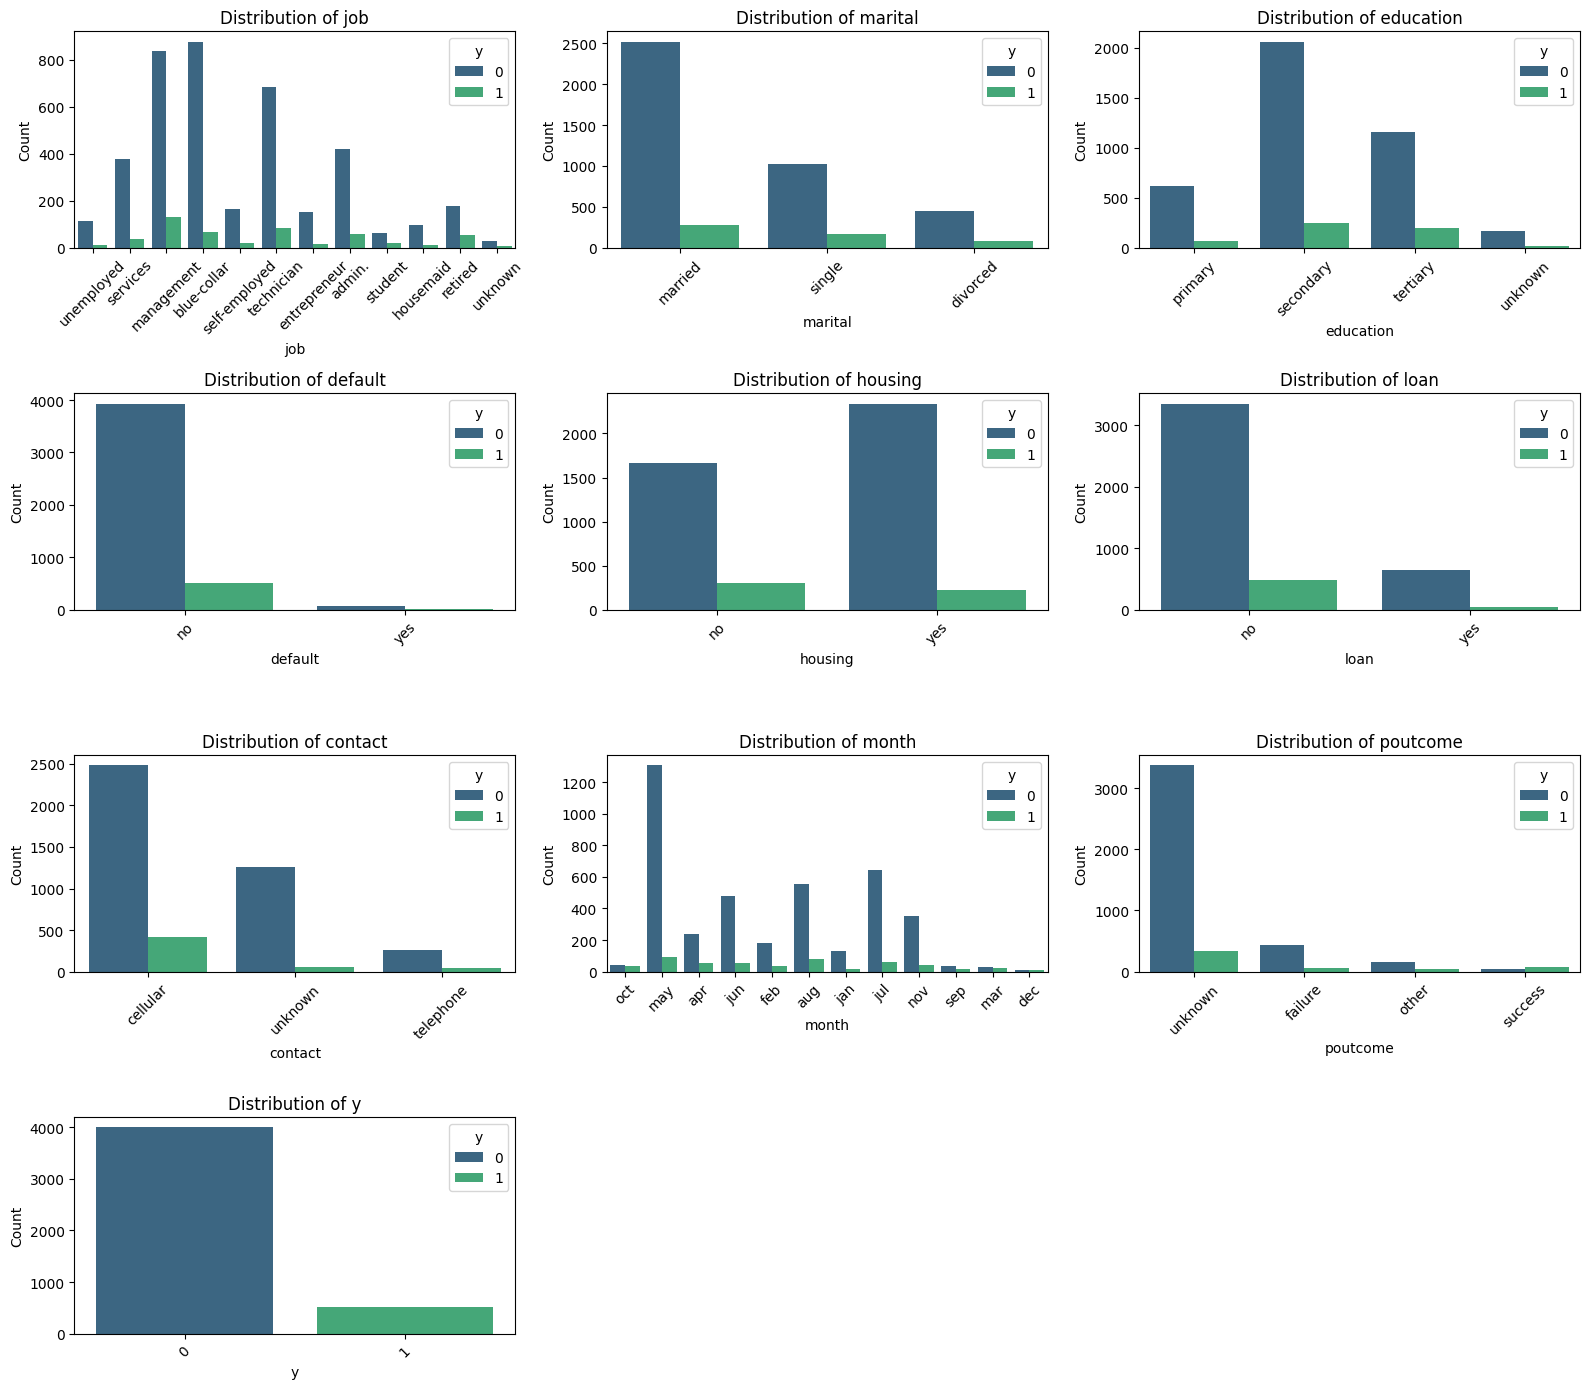

In [ ]:
# Plot a bar chart for each categorical feature showing the count of each category

categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

plt.figure(figsize=(16, 14))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=data, x=col, palette="viridis", hue='y')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

`Job`: The Job category have a diverse distribution. management and blue-collar appears more frequently than others. entreprenuer appear less frequently.

`Marital`: The marital status distribution shows a large number of married individuals, followed by single and divorced.

`Education`: Education level is has a diverse distribution, with majority counts been across secondary and tertiary while few are unknown.

`Default`: The majority of values in default are no, indicating very few individuals with a history of credit default.

`Housing`: The majority of clients have a housing loan (yes), though there is also a signifant proportion with no.

`Loan`: Similar to housing, najority of the clients do not have a personal loan, only a small fraction has personal loan.

`Contact`: The distribution of contact type (e.g., cellular, telephone) could reveal differences in customer preferences and responsiveness to contact methods. Majority were contact via cellular, while there is a noticable amount of unknown option and least clients are contacted via telephone

`Month`: Some months (e.g., may, jul) show significantly higher counts, suggesting seasonal trends in marketing campaigns.

`Poutcome`:  The majority of values are unknown, with fewer instances for success and failure. Despite the high rate of unknown, this feature is important

`Target`: This bar chart shows the distribution of the target variable, revealing the imbalance in classes. There is more `no` than `yes`. There is need to choose approacte metrics (like F1-score or AUC) to access model performance or using SMOTE (oversampling) or other methods for balancing



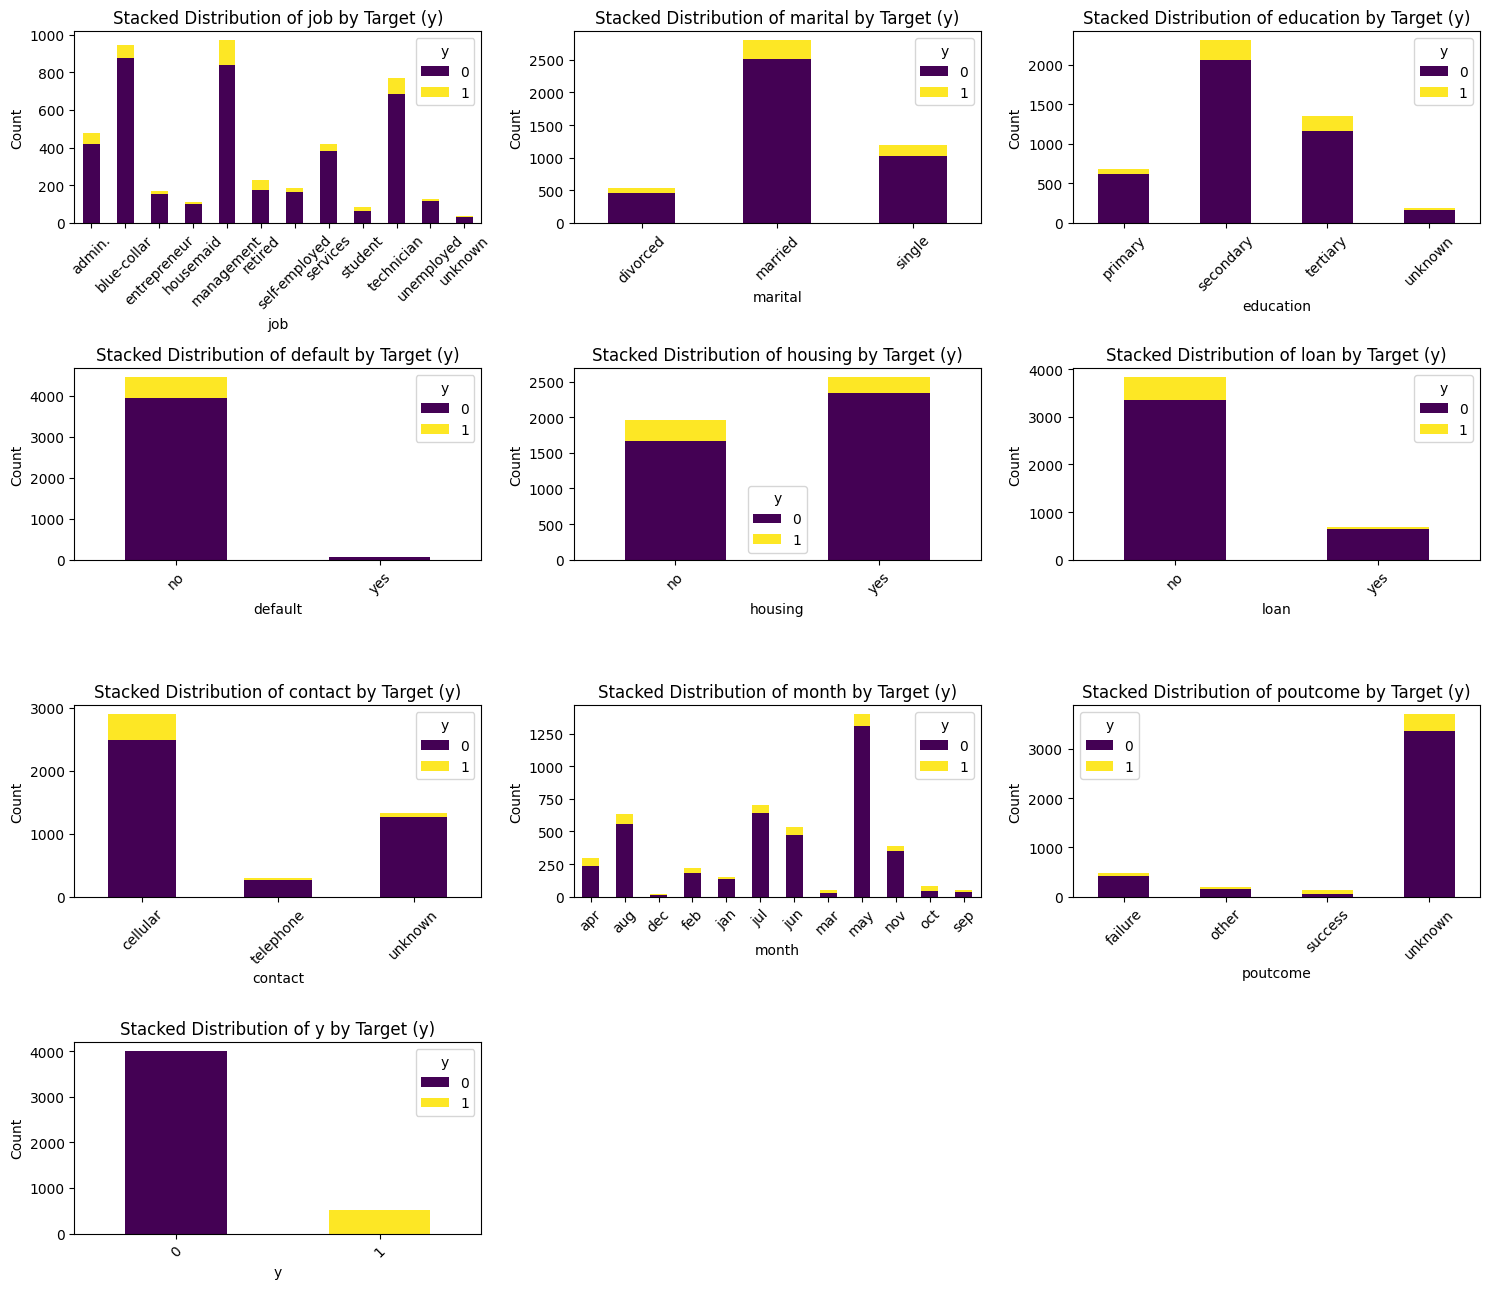

In [ ]:
# Plot Stacked Bar chart to visualise relationship between categorical variables and the target variables

plt.figure(figsize=(15, 13))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)

    stacked_data = data.groupby([col, 'y']).size().unstack(fill_value=0)

    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

    plt.title(f'Stacked Distribution of {col} by Target (y)')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

`Job`: Certain jobs, such as management and self-employed, show higher proportions of term deposit subscriptions (y = yes), while roles like blue-collar and technician have a lower subscription rate. Certain job type therefore correlates strongly with subscription rate

`Education`: Higher education levels, especially tertiary, are associated with a higher likelihood of subscription. This suggests that education level may correlate with financial decision-making, this feature therefore will be important in the model.

`Poutcome` (Outcome of Previous Campaigns):  successful outcome in previous campaigns is a strong indicator of subscription, with a high percentage subscribing again (y = yes). This feature is important and predictive

`Contact`: Subscription rates vary with contact method (cellular has a higher success rate than telephone) but this maybe as a result of high propotion of celullar method.

`Month`: Certain months (like may) have notably lower subscription rates.

In [ ]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,1.0,-1,0.0,unknown,0
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,1.0,339,4.0,failure,0
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,1.0,330,1.0,failure,0
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,4.0,-1,0.0,unknown,0
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,1.0,-1,0.0,unknown,0
5,35.0,management,single,tertiary,no,747.0,no,no,cellular,23,feb,2.0,176,3.0,failure,0
6,36.0,self-employed,married,tertiary,no,307.0,yes,no,cellular,14,may,1.0,330,2.0,other,0
7,39.0,technician,married,secondary,no,147.0,yes,no,cellular,6,may,2.0,-1,0.0,unknown,0
8,41.0,entrepreneur,married,tertiary,no,221.0,yes,no,unknown,14,may,2.0,-1,0.0,unknown,0
9,43.0,services,married,primary,no,-88.0,yes,yes,cellular,17,apr,1.0,147,2.0,failure,0


## Encoding Categorical Variables

**Methodologies for Encoding:**

**Label Encoding:**

Label encoding is a straightforward method that converts categorical values into numeric labels. This technique is particularly useful for ordinal data where categories have a natural order. For example, education can be encoded numerically to reflect their order.

**One-Hot Encoding:**

One-hot encoding is a technique that creates binary columns for each category in a categorical variable. This method is suitable for nominal data where categories do not have a natural order. One-hot encoding prevents the model from assuming any ordinal relationship between the categories.

In [ ]:
#Convert all categorical variable to numeric using One-hot encoding
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder for ordinal categorical variables
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'education' column
data['education'] = label_encoder.fit_transform(data['education'])

nominal_columns = ['job', 'housing', 'loan', 'contact', 'default', 'month', 'poutcome', 'marital']

# Apply One-Hot Encoding to nominal categorical variables
encoded_data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [ ]:
encoded_data.head()

,age,education,balance,day,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
0,30.0,0,1787.0,19,1.0,-1,0.0,0,False,False,...,False,False,False,True,False,False,False,True,True,False
1,33.0,1,4789.0,11,1.0,339,4.0,0,False,False,...,False,True,False,False,False,False,False,False,True,False
2,35.0,2,1350.0,16,1.0,330,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,30.0,2,1476.0,3,4.0,-1,0.0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
4,59.0,1,0.0,5,1.0,-1,0.0,0,True,False,...,False,True,False,False,False,False,False,True,True,False


One hot encoding was used because it suitable when majority of the categorical variable has no clear ordinal relationship

In [ ]:
encoded_data.shape

(4521, 40)

There are now 40 columns in the data after applying one-hot encoding

## Features Selection


In [ ]:
#Applying Variance Threshold to remove low or no variance features
from sklearn.feature_selection import VarianceThreshold

# Define target and features
y = encoded_data['y']
X = encoded_data.drop(columns='y')

# Initializing VarianceThreshold
selector = VarianceThreshold(threshold=0.03)
X_selected = selector.fit_transform(X)

In [ ]:
# Get names of features that were retained
selected_columns = X.columns[selector.get_support(indices=True)]
print("Selected features based on Variance Threshold:\n", selected_columns)

print(f"{X.shape[1]-X_selected.shape[1]} features have been removed, {X_selected.shape[1]} features remain")

Selected features based on Variance Threshold:
 Index(['age', 'education', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_technician', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_may',
       'month_nov', 'poutcome_other', 'poutcome_unknown', 'marital_married',
       'marital_single'],
      dtype='object')
10 features have been removed, 29 features remain


After applying Variancethreshold and experimenting with different threshold value (0.01, 0.03 and 0.05). The threshold is set at 0.03 and 10 features with low variablity were removed

# Splitting dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=10)

#Verifying the split

y_train_dist = y_train.value_counts()
y_test_dist = y_test.value_counts()

y_train.count(), y_test.count(), y_train_dist, y_test_dist

(3164,
 1357,
 y
 0    2799
 1     365
 Name: count, dtype: int64,
 y
 0    1201
 1     156
 Name: count, dtype: int64)

## Handling Class Imbalance

Class imbalance occurs when one class in a dataset is significantly more frequent than others. In this case, the "not subscribed" class (y = 0) is much more frequent than the "subscribed" class (y = 1). This can often lean to bias toward toward majority class i.e model tend to have high overall accuracy but poor performance on minority class.

To handle the Class imbalance, SMOTE method will be applied.

SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority samples, which can improve model learning on the minority class.


In [ ]:
pip install -U imbalanced-learn

In [ ]:
#Check the distribution of the target variable

encoded_data['y'].value_counts()

,count
y,
0,4000
1,521


88% of the observations belong to the not subscribed (Class 0)

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter

# Initialize SMOTETomek for resampling
smote_tomek = SMOTETomek(random_state=0)

# Apply SMOTETomek on the training data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution before and after resampling
print("Class distribution before SMOTETomek:", Counter(y_train))
print("Class distribution after SMOTETomek:", Counter(y_train_resampled))

Class distribution before SMOTETomek: Counter({0: 2799, 1: 365})
Class distribution after SMOTETomek: Counter({0: 2596, 1: 2596})


<Axes: xlabel='y', ylabel='count'>

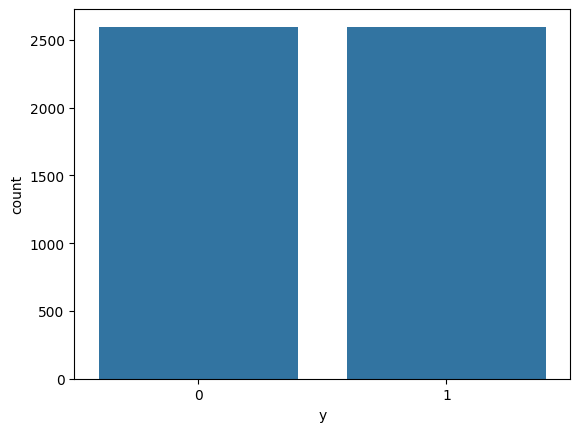

In [ ]:
#Visualising the distribution of the data after applying SMOTE

sns.countplot(x=y_train_resampled)

The class imbalance has been handled and the data is now ready for model development

## Standardizing Features

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


X_train_scaled and X_test_scaled are standardized and ready for model training

In [ ]:
X_train_scaled[:4,:5]

array([[ 0.44012514, -0.34309991, -0.6006593 , -1.16786479,  0.6540096 ],
       [ 1.67639624, -0.34309991,  0.46456091,  1.79672777, -0.23056036],
       [-0.60595041,  1.13252931, -0.58259707,  1.79672777, -0.67284534],
       [-0.79614597, -0.34309991, -0.44848499,  0.50777448, -0.67284534]])

## Applying Classification Algorithm - Decision Tree Decision Tree Classifier and K Nearest Neighbor (KNN)

In [ ]:
#Applying and Fitting Decision Trees
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Model Accuracy: 0.8201915991156964

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1201
           1       0.24      0.26      0.25       156

    accuracy                           0.82      1357
   macro avg       0.57      0.57      0.57      1357
weighted avg       0.83      0.82      0.82      1357



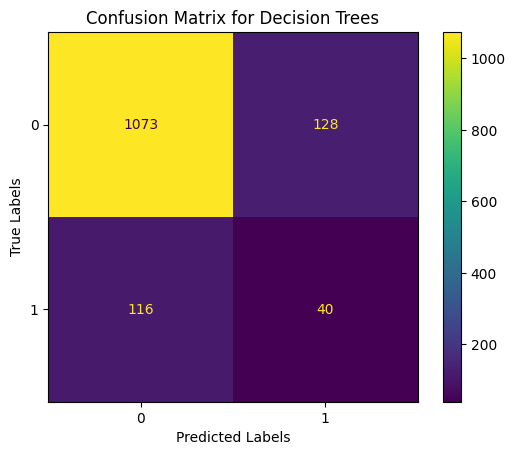

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Decision Trees")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

`True Positives` (TP = 8): The model correctly predicted 8 customers as subscribed (Yes), which matches the actual result.

`False Positives` (FP = 91): The model incorrectly predicted 91 customers as subscribed (Yes) when they actually did not (No). These are Type I errors (false alarms).

`True Negatives` (TN = 1110): The model correctly identified 1110 customers as not subscribed (No), which aligns with the actual result.

`False Negatives` (FN = 148): The model missed 148 customers who actually subscribed (Yes) but were predicted as not subscribed (No). These are Type II errors (missed detections).

`Precision`: For Yes, precision measures the accuracy of predicting that customers subscribe to term deposit. Here the precision is very low (0.08) due to high rate of false positives. this means that model only predict correctly 'yes' 8.0% of the time

`Recall`: Recall measures how well the model captures customers that subscribed to term deposits. With 148 false negatives, recall quite low (0.05) which indicates that missed a significant portion of actual subscribers (False Negatives)

`Accuracy`:The overall accuracy is 82%, the model performs fairly well on the overall dataset and on non-subscribers (No) but really struggles with prediciting actual subscribers (Yes) due to class imbalance and low precision and recall on the positive class.

In [ ]:
#Apply KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier

#Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
#Evaluate the model on the test set
y_pred_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.7324981577008106

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83      1201
           1       0.23      0.55      0.32       156

    accuracy                           0.73      1357
   macro avg       0.58      0.65      0.58      1357
weighted avg       0.85      0.73      0.77      1357



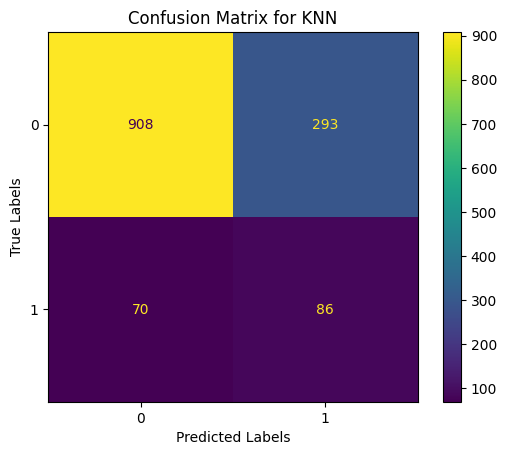

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Confusion Matrix for KNN")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

`True Positives` (TP = 84): The model correctly predicted 84 customers as subscribed (Yes), which matches the actual result.

`False Positives` (FP = 283): The model incorrectly predicted 283 customers as subscribed (Yes) when they actually did not (No). These are Type I errors (false alarms).

`True Negatives` (TN = 918): The model correctly identified 918 customers as not subscribed (No), which aligns with the actual result.

`False Negatives` (FN = 72): The model missed 72 customers who actually subscribed (Yes) but were predicted as not subscribed (No). These are Type II errors (missed detections).

`Precision`: For the positive class, precision measures the accuracy of predicting that customers subscribe to term deposit. Here the precision is low (0.23) due to high rate of false positives (283). this means that model only predict correctly the actual subscribers 23.0% of the time.

`Recall`: Recall measures how well the model captures customers that subscribed to term deposits. With 72 false negatives, recall is a little above average (0.54) which indicates that while the model captures a good amount of the time subscribers actual subscribed ('yes'), it also missed a significant portion of actual subscribers

`Accuracy`:The overall accuracy is 73.8%, the model performs well on non-subscribers (No) but struggles with subscribers (Yes) due to class imbalance and low precision on the positive class.

## Hyperparameter Tuning - Decision Tree Classifier

This step is important order to get the best hyperparameters that can be used to configure the model to get best accurate result. GridSearchCV is used to systematically test different hyperparameters values and find the optimal parameter configuration. In this case, GridSearchCV is configured to search for parameters with higher precision and recall since this is a critical metric when there is class imnbalance

**Key Hyperparameters for each model include:**

**Decision Tree Classifier**:

`max_depth`: Controls the maximum depth of the tree

`min_samples_split `: Minimum number of samples required to split a node

`min_samples_leaf`: Minimum number of samples required to be at a leaf node

`criterion`:Measures the quality of a split (gini or entropy).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define hyperparameters for Decision Tree
tree_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)

# Use only accuracy for scoring
scoring = make_scorer(accuracy_score)

# Set up GridSearchCV with accuracy as the sole scoring metric
grid_tree = GridSearchCV(tree, tree_params, cv=5, scoring=scoring, refit=True)
grid_tree.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and best accuracy score
print("Best parameters for Decision Tree:", grid_tree.best_params_)
print("Best Decision Tree accuracy:", grid_tree.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Decision Tree accuracy: 0.8956312669103426


In [ ]:
# Retrain the model with the best parameters

classifier_optimized = DecisionTreeClassifier(criterion = 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10, class_weight='balanced', random_state=0)
classifier_optimized.fit(X_train_resampled, y_train_resampled)

y_pred_optimized_dt = classifier_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_optimized_dt)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized_dt))

Model Accuracy: 0.8636698599852616

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1201
           1       0.39      0.34      0.36       156

    accuracy                           0.86      1357
   macro avg       0.65      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357



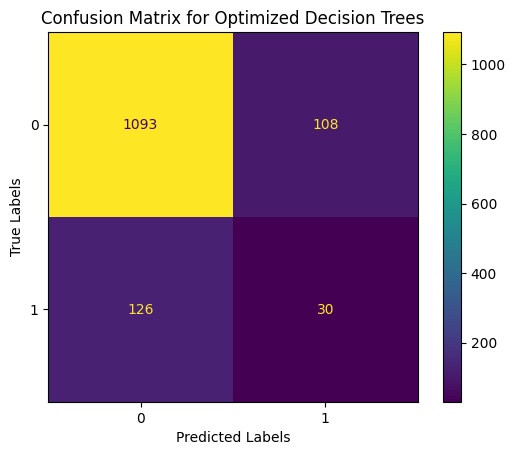

In [ ]:
# Create confusion matrix after optimized model
cm_optimized_dt = confusion_matrix(y_test, y_pred_optimized_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_dt)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Optimized Decision Trees")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

#Hyperparameters Tuning for KNN

**Key Hyperparameters for each model include:**

**KNN**:

`n_neighbors`: Number of neighbors to consider for classification

`weights`: Weight function used in prediction (uniform or distance).

`metric`: Distance metric for neighbors (e.g., euclidean, manhattan).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# hyperparameters for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# set refit to prioritize recall
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score, zero_division=1)
}

#GridSearchCV to select based on recall first
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit='recall', return_train_score=True)
grid_knn.fit(X_train_scaled, y_train_resampled)

# Output best parameters and individual scores for KNN based on highest recall
print("\nBest parameters for KNN (based on recall):", grid_knn.best_params_)
print("Best KNN recall score:", grid_knn.best_score_)
print("\nMean Test Scores for each metric:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}:", grid_knn.cv_results_[f'mean_test_{metric}'])

#selection based on precision, repeating GridSearchCV and setting refit='precision'
grid_knn_precision = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit='precision', return_train_score=True)
grid_knn_precision.fit(X_train_scaled, y_train_resampled)

print("\nBest parameters for KNN (based on precision):", grid_knn_precision.best_params_)
print("Best KNN precision score:", grid_knn_precision.best_score_)


Best parameters for KNN (based on recall): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN recall score: 0.9846415793508816

Mean Test Scores for each metric:
Accuracy: [0.8874617  0.89692822 0.86352435 0.88120755 0.8485202  0.87245468
 0.83208589 0.86566817 0.82261873 0.86155959 0.81190253 0.85620085
 0.80707998 0.84941338 0.79653948 0.84351861 0.79689646 0.84066019
 0.91711589 0.92676146 0.90604095 0.92301098 0.89729079 0.92461908
 0.88478776 0.92354797 0.87496218 0.92051146 0.86692423 0.91801146
 0.86263804 0.91658448 0.8547801  0.91587083 0.8497777  0.91479925]
Precision: [0.82850005 0.83778669 0.79987606 0.81624661 0.78835814 0.8065224
 0.77429417 0.79928065 0.76792678 0.79532404 0.7593363  0.78950437
 0.75567177 0.78400569 0.74480534 0.77759994 0.74581907 0.77415665
 0.88809633 0.8940735  0.88557249 0.89317221 0.88864375 0.89873828
 0.89045533 0.90335893 0.88877017 0.90370041 0.89047542 0.90443371
 0.89260892 0.90591069 0.89140145 0.91097774 0.8912692  

In [ ]:
#Apply KNN Algorithm using the Best parameters

from sklearn.neighbors import KNeighborsClassifier

#Initialize and train the KNN model
knn_optimized = KNeighborsClassifier(n_neighbors=3, metric = "euclidean", weights= "distance")
knn_optimized.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [ ]:
#Evaluate the model on the test set after optimization

y_pred_optimized_knn = knn_optimized.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_optimized_knn)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized_knn))

KNN Model Accuracy: 0.7582903463522476

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85      1201
           1       0.23      0.46      0.31       156

    accuracy                           0.76      1357
   macro avg       0.57      0.63      0.58      1357
weighted avg       0.84      0.76      0.79      1357



In [ ]:
# Create confusion matrix for the optimized model

cm_optimized_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_knn)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Optimized KNN")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

# Using Ensemble Model

Ensemble Models are classification algorithms that combine the predictions of multiple “weaker” models (often called base estimators) to produce a more accurate final prediction. They’re particularly useful in handling class imbalance and complex data patterns because they aggregate predictions, reducing bias and variance.


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize and train the Balanced Random Forest model
brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred_brf = brf_classifier.predict(X_test)
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report for Balanced Random Forest:\n", classification_report(y_test, y_pred_brf))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest Accuracy: 0.8798820928518791

Classification Report for Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1201
           1       0.44      0.17      0.24       156

    accuracy                           0.88      1357
   macro avg       0.67      0.57      0.59      1357
weighted avg       0.85      0.88      0.86      1357



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost with class weight adjustments for imbalance
xgb = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=0)

# Train on the original or SMOTE-resampled data
xgb.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.871039056742815

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1201
           1       0.38      0.19      0.26       156

    accuracy                           0.87      1357
   macro avg       0.64      0.58      0.59      1357
weighted avg       0.84      0.87      0.85      1357



In [ ]:
## Comparing thr two Model Results - Need to review code

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'KNN': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
})

# Melt the DataFrame for easier plotting
metrics_melted_df = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Plot the performance metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted_df)
plt.title('Performance Metrics Comparison: Logistic Regression vs. Decision Tree')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Feature Importance  (Need to review)

# Extract feature importance scores from the Decision Tree model
feature_importances = random_search_dt.best_estimator_.feature_importances_

# Create a DataFrame for the feature importances
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by the importance scores
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()
